## EDA CASE STUDY- by Tushar Joshi & Smriti Panda

This case has been undertaken to perform EDA in a real business scenario. 
In this case study, we apply techniques of Exploratory Data Analysis.We will also Highlight 
the risk analytics in banking and financial services, and understand how data is used to minimise the 
risk of losing money while lending to customers.

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=200
pd.options.display.max_rows=200

In [1]:
#Loading the Data set
ad=pd.read_csv("application_data.csv")
ad.head()

NameError: name 'pd' is not defined

In [4]:
#Checking the shape of the dataset
ad.shape

(307511, 122)

In [5]:
#checking the data types of every column.
ad.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
# Checking the percentage of null columns in terms of percentage to get further idea regarding EDA
round(ad.isnull().sum()*100/len(ad),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [8]:
# Visually inspecting all the columns with Null VAues
ad.loc[:, ad.isnull().any()]

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,27558.0,225000.0,Unaccompanied,NaN,Sales staff,1.0,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,12001.5,225000.0,Unaccompanied,NaN,NaN,1.0,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,

##### We see that there are 67 columns with null values

#### After inspecting the percentage of null values we will remove the columns with more than 40% null values.

In [9]:
# The following are the columns that need to be dropped
ad.columns[ad.isnull().mean()>=.4]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [10]:
ad.loc[:, ad.isnull().mean()>=.4]

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,NaN,0.083037,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No
1,NaN,0.311267,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,NaN,0.145570,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No
307507,NaN,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No
307508,NaN,0.744026,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0000,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No
307509,NaN,NaN,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No


In [11]:
ad=ad.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],axis=1)

In [12]:
# Checking the shape.

ad.shape

(307511, 73)

In [13]:
round(ad.isnull().sum()*100/len(ad),2) 

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

##### ANALYSING THE COLUMNS WITH 13.50% NULL VALUES.

In [14]:
# Describing the columns with 13.5% null values, for further analysis.

print(ad["AMT_REQ_CREDIT_BUREAU_HOUR"].describe())
print(ad["AMT_REQ_CREDIT_BUREAU_DAY"].describe())
print(ad["AMT_REQ_CREDIT_BUREAU_WEEK"].describe())
print(ad["AMT_REQ_CREDIT_BUREAU_MON"].describe())
print(ad["AMT_REQ_CREDIT_BUREAU_QRT"].describe())
print(ad["AMT_REQ_CREDIT_BUREAU_YEAR"].describe())

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
count    265992.000000
mean          0.265474
std           0.794056
m

In [15]:
# Checking the unique values of the above mentioned columns.

print(ad['AMT_REQ_CREDIT_BUREAU_HOUR'].nunique())
print(ad['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())
print(ad['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())
print(ad['AMT_REQ_CREDIT_BUREAU_MON'].nunique())
print(ad['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())
print(ad['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())

5
9
9
24
11
25


In [16]:
#Analysis the various values of the columns

print(ad.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True))
print(ad.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True))
print(ad.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True))
print(ad.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True))
print(ad.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True))
print(ad.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True))


0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0.0      0.809863
1.0      0.1

### OBSERVATION

 GOING THROUGH THESE COLUMNS IT SEEMS LIKE THESE ARE CATEGORICAL COLUMNS THAT REPRESENT DAYS MONTHS
AND YEARS. AND SEEING THAT THE MAXIMUM NUMBER OF VALUES ARE 0, AND THESE BEING THE CATEGORICAL COLUMNS
. THE NULL VALUES CAN BE REPLACE WITH THE MODE VALUE, WHICH IS "0"

In [17]:
ad["AMT_REQ_CREDIT_BUREAU_HOUR"]= ad["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0)

In [18]:
ad["AMT_REQ_CREDIT_BUREAU_DAY"]= ad["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0)

In [19]:
ad["AMT_REQ_CREDIT_BUREAU_MON"]= ad["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)


In [20]:
ad["AMT_REQ_CREDIT_BUREAU_MON"]= ad["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)


In [21]:
ad["AMT_REQ_CREDIT_BUREAU_QRT"]= ad["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0)


In [22]:
ad["AMT_REQ_CREDIT_BUREAU_WEEK"]= ad["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0)

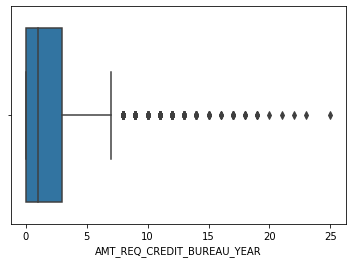

In [23]:
sns.boxplot(ad["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()


WE CAN SEE THAT THE BOX PLOT FOR THE COLUMN 'AMT_REQ_CREDIT_BUREAU_YEAR', THERE IS NO MUCH GAP BETWEEN
THE FINAL QUARTILE AND THE OUTLIERS, IN THE SENSE, ITS A CONTINUOUS VARIABLE AND IT CAN BE IMPUTED BY
MEDIAN.

In [24]:
ad["AMT_REQ_CREDIT_BUREAU_YEAR"]= ad["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(1.899974)


#### ANALYSING THE ABOVE MENTIONED COLUMNS WITH BOX PLOTS.

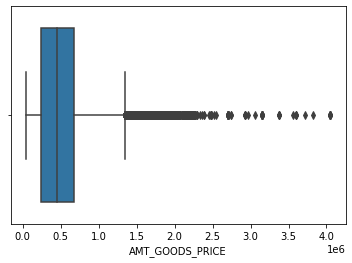

In [25]:
sns.boxplot(ad['AMT_GOODS_PRICE'])
plt.show()


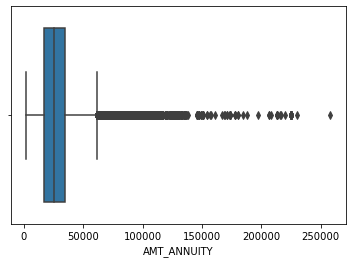

In [26]:
sns.boxplot(ad['AMT_ANNUITY'])
plt.show()

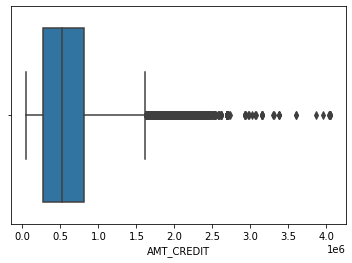

In [27]:
sns.boxplot(ad['AMT_CREDIT'])
plt.show()

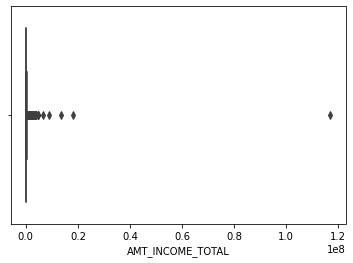

In [28]:
sns.boxplot(ad['AMT_INCOME_TOTAL'])
plt.show()

##### FROM THE ABOVE BOX PLOTS WE OBSERVE THAT THE COLUMNS'AMT_INCOME_TOTAL',AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE' HAVE LARGE OUTLIERS PRESENT AT THE 100TH PERCENTILE, IN ORDER TO PERFORM AN ACCURATE EDA WE CAN REMOVE THE OUTLIERS WITH 1.5 IQR 

In [29]:
round(ad.isnull().sum()*100/len(ad),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

#### OBSERVATION

HAVING PERFORMED THE EDA ON THE DATASET ONCE WITH ALL THE COLUMNS INTACT, WE FOUND THAT WE DID 
NOT USE THE FOLLOWING COLUMNS. HENCE DROPPING THE FOLLOWING COLUMNS

In [30]:
ad=ad.drop(['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1)

In [31]:
# CHECKING THE SHAPE OF THE DATAFRAME.

ad.shape

(307511, 42)

##### NOW WE CAN ANALYSE VARIOUS COLUMNS IN FURTHER DETAIL

In [32]:
# CHECKING FOR THE UNIQUE VALUES.

ad.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        26
O

In [33]:
### Analysing the column "CODE_GENDER "

ad['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

###### We see that one of the attributes is 'XNA', which cannot be possible in the categorical variable of gender. Also, since the percentage of XNA is very low, it can be imputed to F

In [34]:
ad.loc[ad['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
ad['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [35]:
ad.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,2.152665,12.063419,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,0.005538,0.006055,0.029723,0.231293,0.229631,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.910682,3.265832,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,0.078014,0.103037,0.190728,0.856810,0.744059,1.738528
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,2.000000,10.000000,0.000000,0.000000,0.000000,3.924574e-01,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,2.000000,12.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.899974
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,3.000000,14.000000,0.000000,0.000000,0.000000,6.636171e-01,0.669057,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,20.000000,23.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


###### FROM VISUAL INSPECTION WE SEE THAT THE COLUMNS, 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', HAVE -VE VALUES. HENCE CONVERTING THEM TO POSITIVE VALUES

In [36]:
ad['DAYS_BIRTH']=ad['DAYS_BIRTH'].abs()
ad['DAYS_EMPLOYED']=ad['DAYS_EMPLOYED'].abs()
ad['DAYS_REGISTRATION']=ad['DAYS_REGISTRATION'].abs()
ad['DAYS_ID_PUBLISH']=ad['DAYS_ID_PUBLISH'].abs()
ad.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,Core staff,1.0,THURSDAY,11,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


###### We Also observe that the above mentioned columns are in days, EDA may be more convenient if the days are converted to years

In [37]:
day_colm = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
ad[day_colm] = ad[day_colm]/365
ad[day_colm].describe()

## It would also be better to rename them after converting to years.

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [38]:
# RENAMING THE 'DAYS' COLUMNS TO 'YEARS'

ad.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,Core staff,1.0,THURSDAY,11,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [39]:
# CHECKING THE DATA TYPES

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

###### WE SEE THAT THERE ARE SOME COLUMNS, DESPITE BRING CATEGORICAL DATA TYPE, ARE MENTIONED AS INTEGER OR FLOAT, SO CONVERTING THE RELEVANT COLUMNS TO OBJECT TYPE, SO THAT THEY CANNOT BE IMPUTED LATER.

In [40]:
# WE SHALL CHANGE THE DATA TYPE OF ALL THE COLUMNS WITH LESS THAN 3 UNIQUE VALUES TO OBJECT TYPE.

for col in ad.columns:
    if ad[col].nunique()<=3: 
        ad[col] = ad[col].astype(object)

ad.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  object 
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [41]:
#WE STILL OBSERVE THAT 'SK_ID_CURR' IS BEING SHOWN AS INT. EVEN THOUGH IT IS TRUE, 
#THE COLUMN REPRESENTS THE UNIQUE ID VALUES. HENCE WE CAN CONVERT THIS TO OBJECT. 

ad['SK_ID_CURR'] = ad['SK_ID_CURR'].astype('object')

In [42]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  object 
 1   TARGET                      307511 non-null  object 
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [43]:
ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,Core staff,1.0,THURSDAY,11,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


###### FROM THE DATA SET, ITS LOGICAL TO COME TO THE CONCLUSION THAT THE "AMT_INCOME_TOTAL" & "AMT_CREDIT" ARE VERY IMPORTANT COLUMNS FOR FURTHER UNIVARIATE AND BIVARIATE ANALYSIS. BUT THESE ARE CONTINUES VALUES AND ITS HARD TO MAKE ANY ANALYSIS THROUGH THESE. HENCE WE BIN THEM AND IMPUTE THEM INTO TWO NEW COLUMNS.

In [44]:
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']

ad['AMT_INCOME_RANGE'] = pd.cut(ad['AMT_INCOME_TOTAL'],bins,labels=ranges)
ad['AMT_CREDIT_RANGE'] = pd.cut(ad['AMT_CREDIT'],bins,labels=ranges)

ad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.899974,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,Core staff,1.0,THURSDAY,11,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,100000-250000,500000-750000


###### WE HAVE DONE SIGNIFANT AMOUNT OF SANITY CHECKS ON THE DATA FRAME TO PROCEED TO EDA.

## ANALYSING THE TARGET COLUMN

In [45]:
ad1 = ad[ad['TARGET']==1] # REPRESENTS CLIENTS WITH DEFAULTS
ad0 = ad[ad['TARGET']==0] # REPRESENTS CLIENDS WITH NO DEFAULTS/ NO PAYMENT DIFFICULTIES

In [46]:
# CHECKING THE SHAPE OF THE DATA FRAME.
print(ad1.shape)
print(ad0.shape)

(24825, 44)
(282686, 44)


In [47]:
ad1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.298630,7.200000,18.008219,5.005479,1,Cooking staff,1.0,MONDAY,9,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47.895890,3.457534,3.238356,2.819178,1,Laborers,2.0,TUESDAY,9,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36.668493,9.854795,0.123288,12.079452,1,Sales staff,2.0,THURSDAY,11,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67.928767,1000.665753,14.769863,11.504110,1,NaN,2.0,THURSDAY,10,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000


In [48]:
ad0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,Laborers,2.0,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.899974,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,Core staff,1.0,THURSDAY,11,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,100000-250000,500000-750000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,13.616438,1.306849,1,Laborers,2.0,WEDNESDAY,16,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0-100000,250000-500000


## ANALYSING THE DATA IMBALANCE

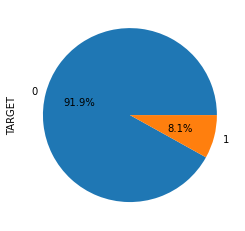

In [49]:
# PLOTTING A PIE PLOT TO ANALYSE THE PERCENTAGE OF DEFAULT CLIENTS AND NON- DEFAULT CLIENTS.

ad.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()


###### FROM THE PIE CHART WE OBSERVE THAT THERE IS HUGE IMBALANCE BETWEEN THE PERCENTAGE OF DEFAULTERS WITH RESPECT TO NON DEFAULTERS.

##### FINDING THE DATA IMBALANCE RATIO

In [50]:
# FINDING THE RATIO OF NON-DEFAULTERS TO DEFAULTERS.

imb_ratio = round(ad0.shape[0]/ad1.shape[0], 2)
imb_ratio


11.39

#### SO THE DATA IMBALANCE RATIO IS COMING TO BE 11.39:1

### TOP TEN CORREALTIONS 

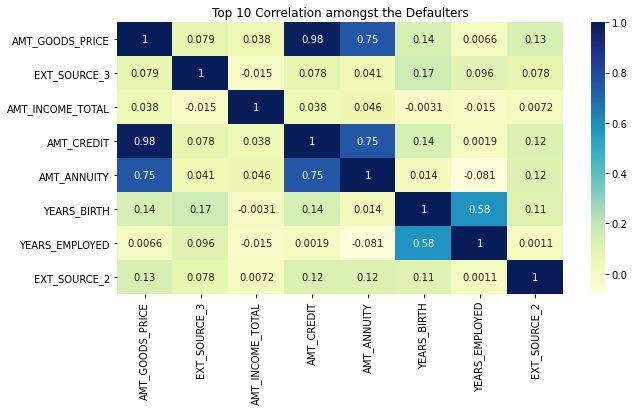

In [51]:
# CLIENTS WITH DEFAULTS

colum=['AMT_GOODS_PRICE','EXT_SOURCE_3','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','YEARS_BIRTH','YEARS_EMPLOYED','EXT_SOURCE_2']
cor1=ad1[colum].corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor1, annot = True, cmap="YlGnBu")
plt.title('Top 10 Correlation amongst the Defaulters')
plt.show()

#### TOP CORRELATIONS ARE

1)AMT_CREDIT & AMT_GOODS_PRICE, 
2)AMT_CREDIT & AMT_ANNUITY, 
3)AMT_GOODS_PRICE & AMNT_ANNUITY, 
4)YEARS_BIRTH & YEARS_EMPLOYED, 
5)AMNT_ANNUITY & AMNT_INCOME_TOTAL, 
6)AMNT_INCOME_TOTAL & AMNT_CREDIT

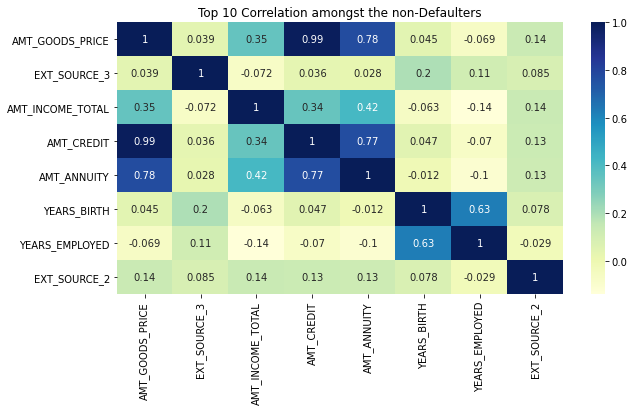

In [52]:
# CLIENTS WITHOUT DEFAULTS.

colum=['AMT_GOODS_PRICE','EXT_SOURCE_3','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','YEARS_BIRTH','YEARS_EMPLOYED','EXT_SOURCE_2']
cor0=ad0[colum].corr()
plt.figure(figsize = (10,5))
sns.heatmap(cor0, annot = True, cmap="YlGnBu")
plt.title('Top 10 Correlation amongst the non-Defaulters')
plt.show()


### TOP CORRELATIONS ARE

1)AMT_CREDIT & AMT_GOODS_PRICE, 
2)AMT_GOODS_PRICE & AMNT_ANNUITY
3)AMT_CREDIT & AMT_ANNUITY,
4)YEARS_BIRTH & YEARS_EMPLOYED,
5) AMNT_INCOME_TOTAL & AMNT_CREDIT

# UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS

#LOAN TYPE PREFEERD BY THE CLIENT

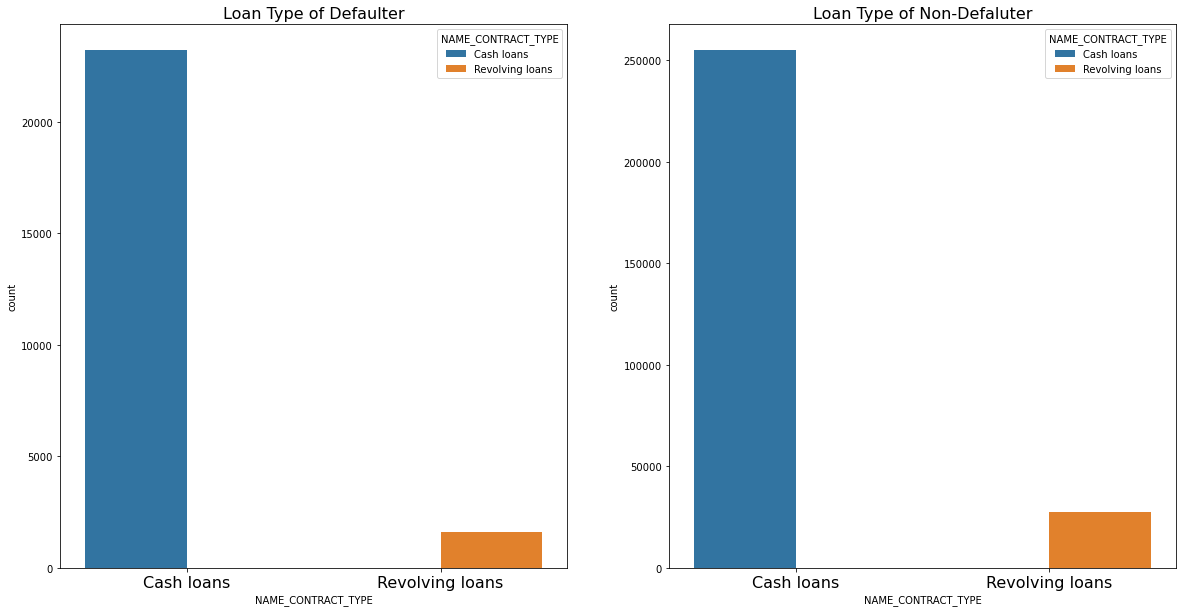

In [53]:
# plotting based on 'NAME_CONTRACT_TYPE' 
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='NAME_CONTRACT_TYPE',data = ad1, hue='NAME_CONTRACT_TYPE')
plt.title('Loan Type of Defaulter', fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = ad0, hue='NAME_CONTRACT_TYPE')
plt.title('Loan Type of Non-Defaluter', fontsize=16)
plt.xticks(rotation=0, fontsize=16)
plt.show()

#
WE CAN SEE FROM THE GRAPH THAT CASH LOANS ARE HIGH IN NUMBER IN THOSE WHO HAVE DEFAULTED AND IN THOSE WHO HAVE NOT DEFULTED. REVOLVING LOANS ARE PREFERRED MUCH LESS BY THE CUSTOMERS 

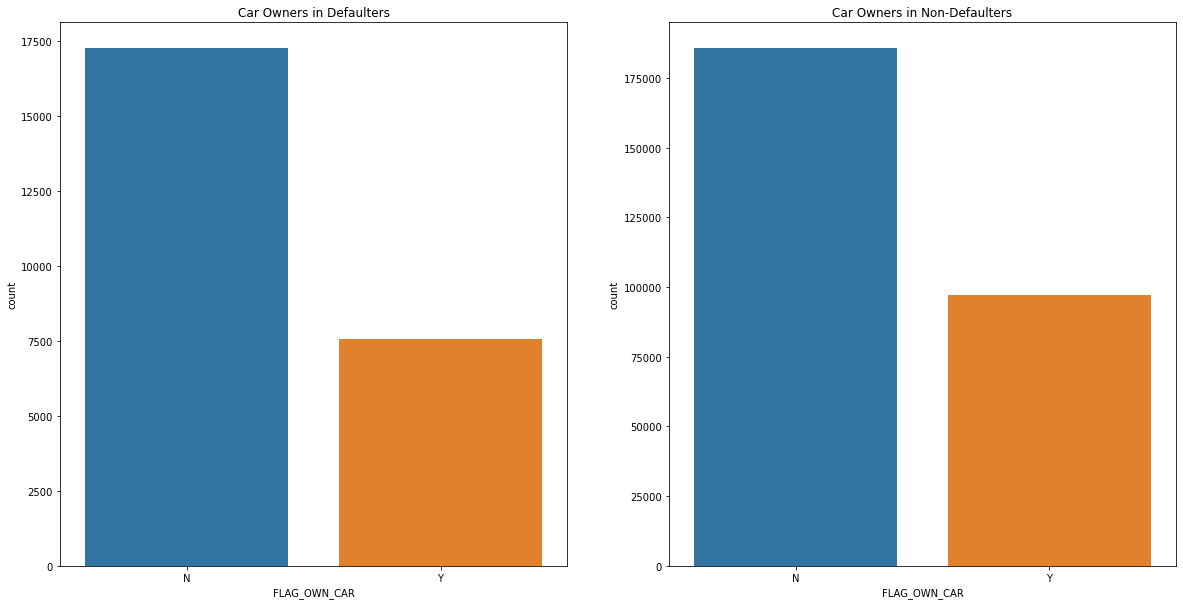

In [54]:
# CAR OWNERSIP OF THE APPLICANTS

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='FLAG_OWN_CAR',data = ad1)
plt.title('Car Owners in Defaulters')
plt.subplot(1,2,2)
sns.countplot(x ='FLAG_OWN_CAR', data = ad0)
plt.title('Car Owners in Non-Defaulters')
plt.show()

#
WE CAN SEE FROM THE GRAPH THAT A VERY HIGH NUMBER OF PEOPLE, AMONGST THE DEFAULTERS AND NON-DEFAULTERS DO NOT OWN A CAR

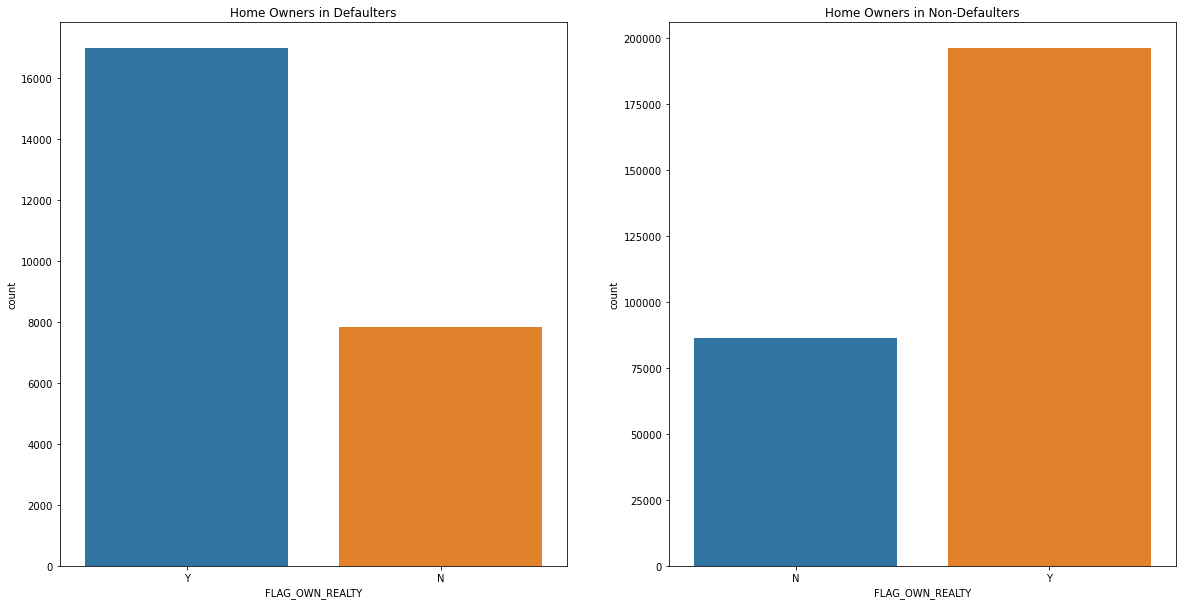

In [55]:
# HOME OWNERSIP OF THE APPLICANTS
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='FLAG_OWN_REALTY',data = ad1)
plt.title('Home Owners in Defaulters')
plt.subplot(1,2,2)
sns.countplot(x ='FLAG_OWN_REALTY', data = ad0)
plt.title('Home Owners in Non-Defaulters')
plt.show()

##
WE CAN SEE THAT AMONGST THE NON DEFAULTERS, THERE ARE MORE PEOPLE WHO OWN A HOME, BOTH AMONG DEFAULTERS AND NO-DEFAULTERS.

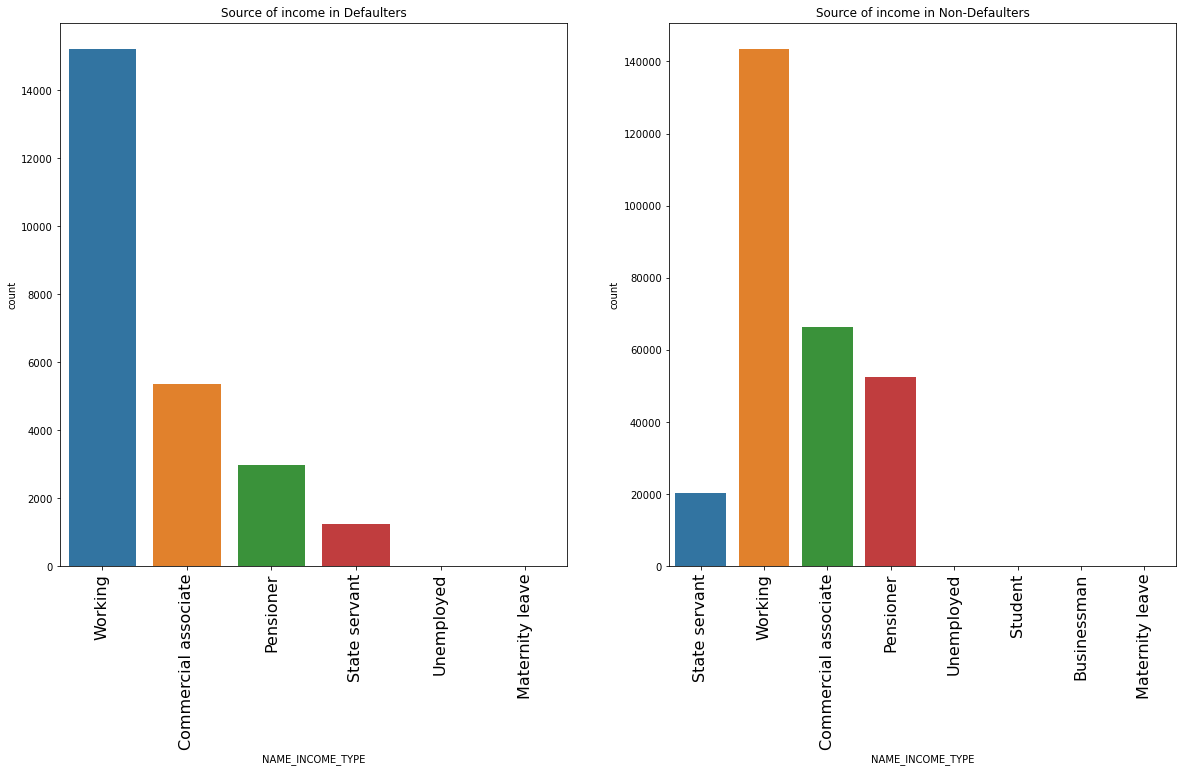

In [56]:
# INCOME TYPE OF THE APPLICANTS

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='NAME_INCOME_TYPE',data = ad1)
plt.title('Source of income in Defaulters')
plt.xticks(rotation=90, fontsize=16)
plt.subplot(1,2,2)
sns.countplot(x ='NAME_INCOME_TYPE', data = ad0)
plt.title('Source of income in Non-Defaulters')
plt.xticks(rotation=90, fontsize=16)
plt.show()

##
WE SEE THAT BOTH AMONGST THE DEFAULTERS AND NON DEFAULTERS THE PEOPLE WITH DAY JOBS ARE HIGHEST.

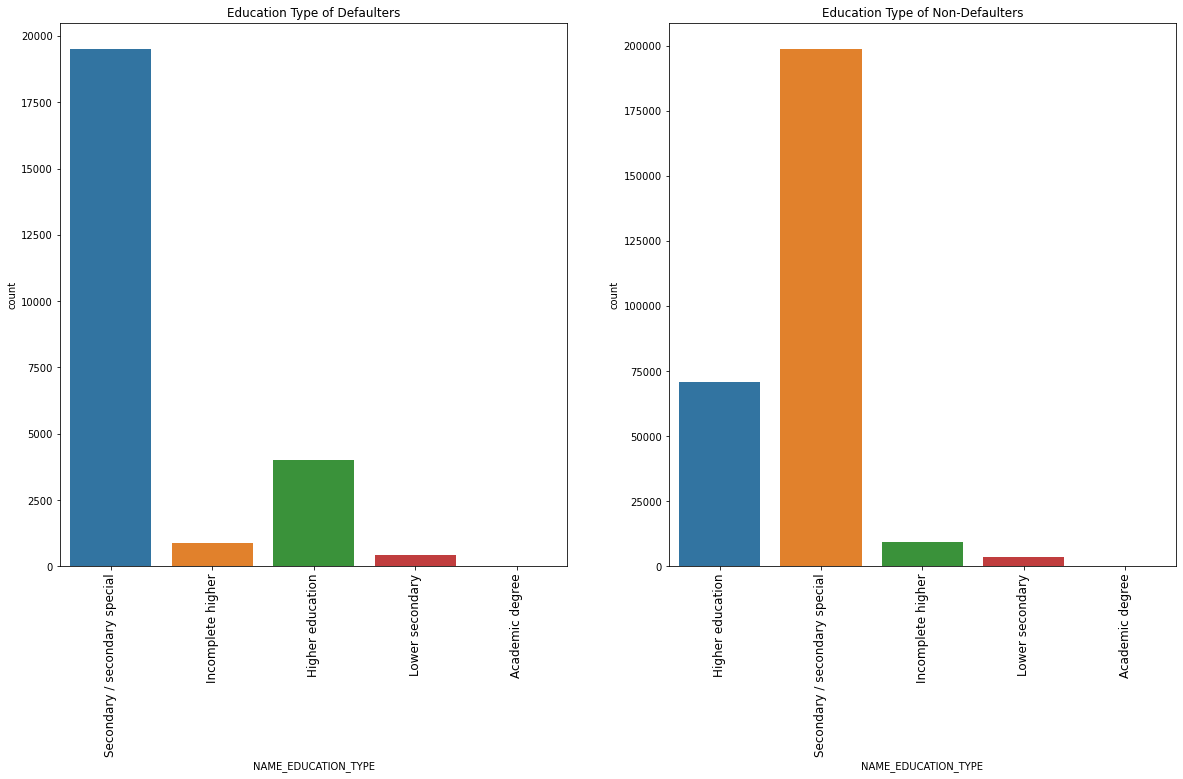

In [57]:
# EDUCATION LEVEL OF THE APPLICANTS

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='NAME_EDUCATION_TYPE',data = ad1)
plt.title('Education Type of Defaulters')
plt.xticks(rotation=90, fontsize=12)
plt.subplot(1,2,2)
sns.countplot(x ='NAME_EDUCATION_TYPE', data = ad0)
plt.title('Education Type of Non-Defaulters')
plt.xticks(rotation=90, fontsize=12)
plt.show()


##
THE EDUCATION TYPE OF BOTH THE DEFAULTERS AND NON- DEFAULTERS SEEMS TO BE SECONDARY/SECONDARY SPECIAL. WHERE AS FOR NON DEFAULTERS IT IS LOWER SECONDARY OR INCOMPLETE HIGHER. 

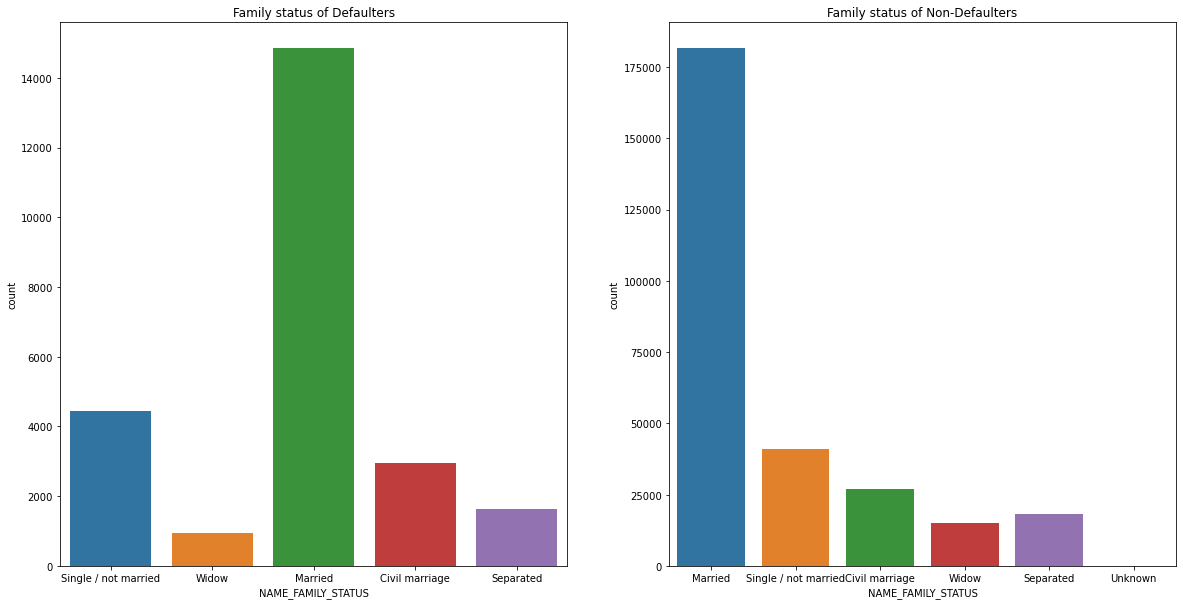

In [58]:
#FAMILY STATUS OF THE APPLICANTS

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='NAME_FAMILY_STATUS',data = ad1)
plt.title('Family status of Defaulters')
plt.subplot(1,2,2)
sns.countplot(x ='NAME_FAMILY_STATUS', data = ad0)
plt.title('Family status of Non-Defaulters')
plt.show()

THE APPLICANTS WHO ARE MARRIED ARE THE HIGHEST NUMBER OF DEFAULTERS AND NON DEFAULTERS. WHEREAS WIDOWS ARE THE LOWEST NUMBERS OF DEFAULETRS AS WELL AS NON- DEFAULTERS.

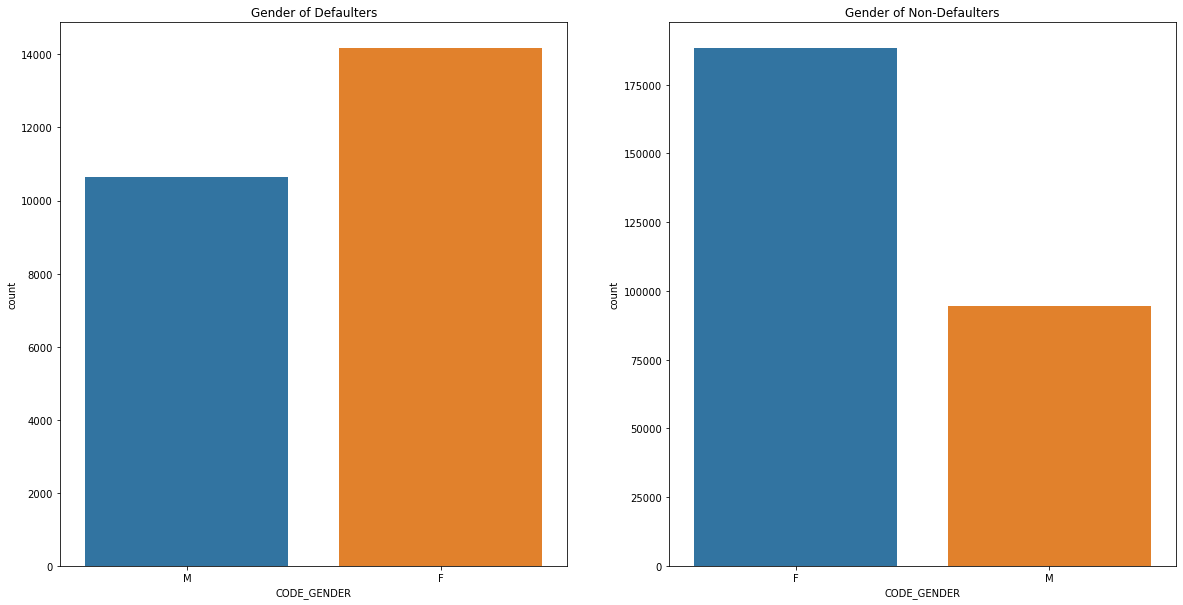

In [59]:
# GENDER OF APPLICANTS

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='CODE_GENDER',data = ad1)
plt.title('Gender of Defaulters')
plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = ad0)
plt.title('Gender of Non-Defaulters')
plt.show()

##### IN BOTH THE CASES THE NUMBER OF FEMALES IS HIGH, MEANING, IT IS THE FEMALES THAT HAVE APPLIED FOR MOST LOANS

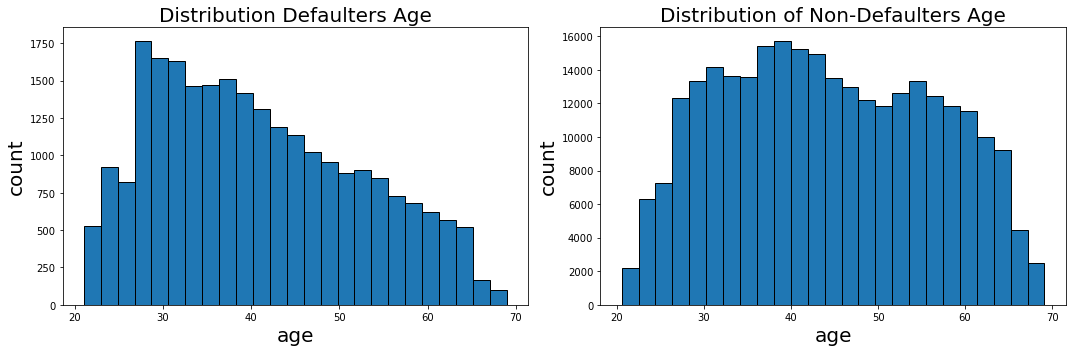

In [60]:
# AGE OF THE APPLICANTS.

plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(ad1['YEARS_BIRTH'], edgecolor = 'k', bins = 25)
plt.xlabel("age", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title('Distribution Defaulters Age', fontsize=20)
plt.subplot(1,2,2)
plt.hist(ad0['YEARS_BIRTH'], edgecolor = 'k', bins = 25)
plt.xlabel("age", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title('Distribution of Non-Defaulters Age', fontsize=20)
plt.show()



##

FROM THE HISTOGRAM WE SEE THAT THE HIGHEST NUMBER OF NON-DEFAULTERS ARE BETWEEN 25-30 YEARS, AND AS THE AGE INCREASES THE NUMBER OF NON- DEFALUTERS ALSO INCREASES.PEOPLE WITH AGE GROUP FROM 25-30ARE PREFERRABLE FOR CREDIT.
FOR THE DEFAULTERS PEOPLE BETWEEN THE AGE GROUP OF 35-45 TEND TO DEFAULT THE MOST, SO CREDIT LOANS TO THIS AGE GROUP IS NOT PREFERRABLE

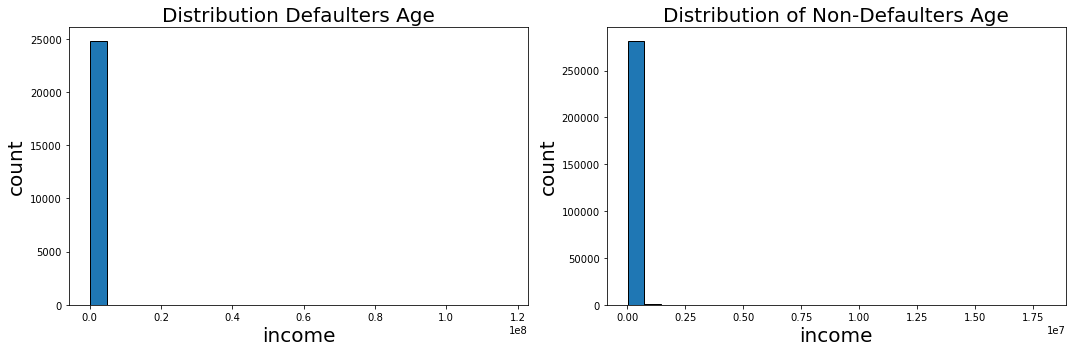

In [61]:
plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(ad1['AMT_INCOME_TOTAL'], edgecolor = 'k', bins = 25)
plt.xlabel("income", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title('Distribution Defaulters Age', fontsize=20)
plt.subplot(1,2,2)
plt.hist(ad0['AMT_INCOME_TOTAL'], edgecolor = 'k', bins = 25)
plt.xlabel("income", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title('Distribution of Non-Defaulters Age', fontsize=20)
plt.show()


## 
DUE TO HIGH NUMBER OF OUTLIERS, WE ARE NOT ABLE TO ANALYSE THE GRAPH PROPERLY

In [62]:
## TURNING THE 99TH PERCENTILE VALUES TO NAN, AND PLOTTING THE GRAPH AGAIN

ad=ad[ad.AMT_INCOME_TOTAL<np.nanpercentile(ad['AMT_INCOME_TOTAL'], 99)]

#update dataframes
ad1=ad[ad.TARGET==1] 
ad0=ad[ad.TARGET==0]


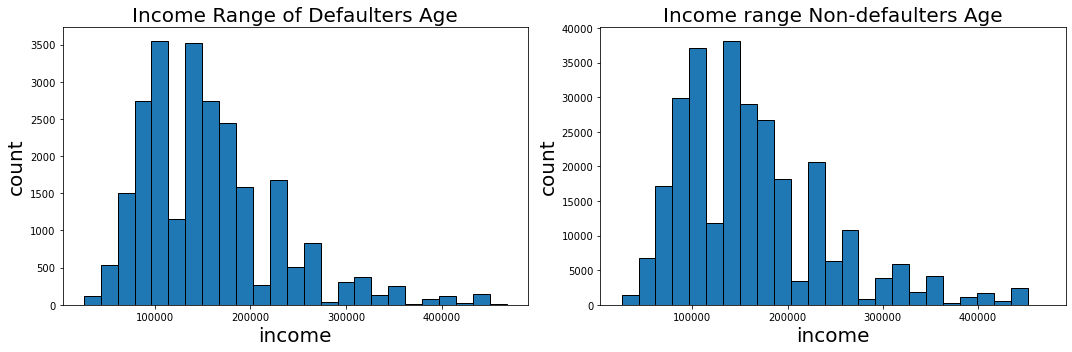

In [63]:
# ANALYSING THE INCOME RANGE.

plt.figure(figsize = (15,5),tight_layout = True)
plt.subplot(1,2,1)
plt.hist(ad1['AMT_INCOME_TOTAL'], edgecolor = 'k', bins = 25)
plt.xlabel("income", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title('Income Range of Defaulters Age', fontsize=20)
plt.subplot(1,2,2)
plt.hist(ad0['AMT_INCOME_TOTAL'], edgecolor = 'k', bins = 25)
plt.xlabel("income", fontsize=20)
plt.ylabel("count", fontsize=20)
plt.title('Income range Non-defaulters Age', fontsize=20)
plt.show()


## 
MOST OF THE INCOME RANGES ARE BETWEEN 50,000- 200000
WE SEE THAT THE INCOME RANGES OF THE BOTH DEFAULTERS AND NON- DEFAULTERS ARE ALMOST SAME. SO GOING FOR FURTHER ANALYSIS.

### UNIVARIATE ANALYSIS OF THE NUMERICAL COLUMNS.


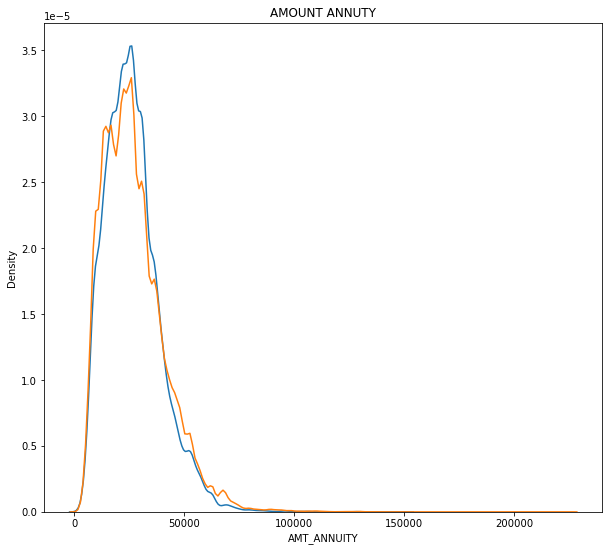

In [64]:
# PLOTTING KDE FOR LOAN ANNUITY.

plt.figure(figsize = (10,9))
sns.kdeplot(ad1['AMT_ANNUITY'], label = 'default')
sns.kdeplot(ad0['AMT_ANNUITY'], label = 'non-default')
plt.title('AMOUNT ANNUTY')
plt.show()

#

LOAN ANNUITY IS MOSTLY CONCENTRATED BETWEEN 0-50000.
THE GRAPH PATTERN IS SAME FOR BOTH DEFAULTERS AND NON- DEFAULTERS.


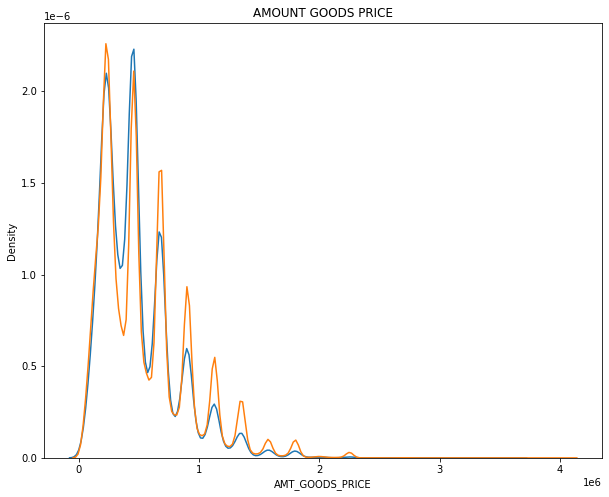

In [65]:
#KDE PLOT FOR THE VALUE OF THE GOODS, FOR WHICH THE LOAN WAS AVAILED.
plt.figure(figsize = (10,8))
sns.kdeplot(ad1['AMT_GOODS_PRICE'],label ='default')
sns.kdeplot(ad0['AMT_GOODS_PRICE'],label ='non-default')
plt.title(r'AMOUNT GOODS PRICE')
plt.show()

#

EVEN IN THIS KDE PLOT WE SEE THAT THE GRAPH ALMOST FOLLOWS A SIMILAR PATTERN DISTRIBUTION.
THERE ARE SOME SIMILARITIES BETWEEN 150000-220000, HENCE MORE EXPENSIVE THE GOODS, LESS CHANCES OF DEFAULT.


## BIVARIATE ANALYSIS

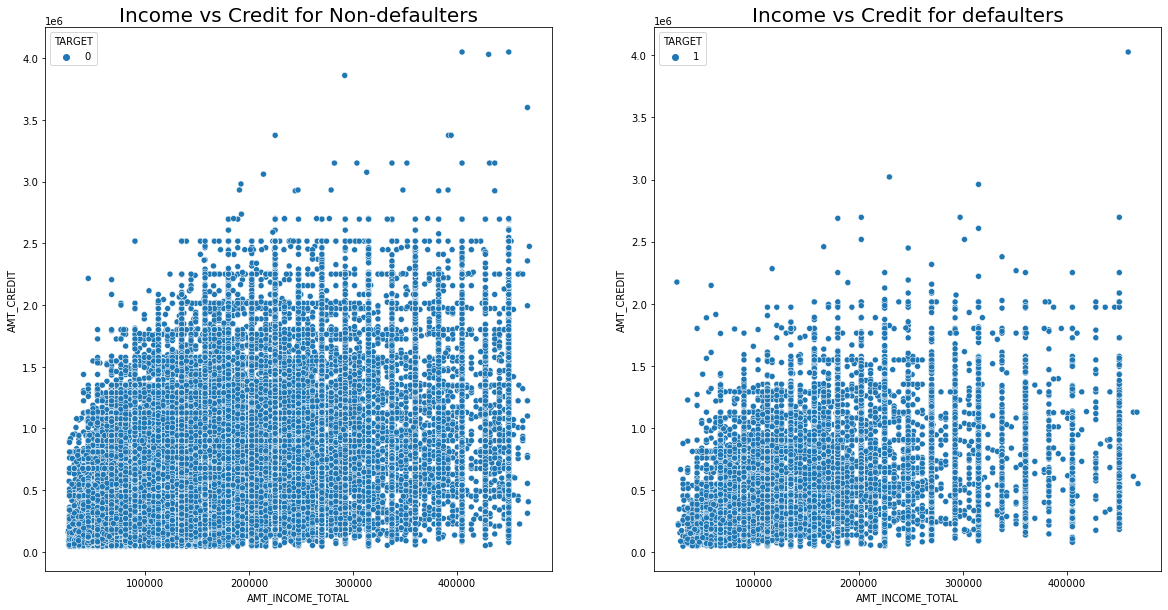

In [66]:
# SCATTER PLOT FOR INCOME AND CREDIT.

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax=sns.scatterplot(data=ad0, x='AMT_INCOME_TOTAL',y='AMT_CREDIT', hue='TARGET')
plt.title('Income vs Credit for Non-defaulters', fontsize=20)

plt.subplot(1,2,2)
ax = sns.scatterplot(data=ad1, x='AMT_INCOME_TOTAL',y='AMT_CREDIT', hue='TARGET')
plt.title('Income vs Credit for defaulters', fontsize=20)
plt.show()

THE DENSITY OF DEFAULTS IS LOW WHEN THE INCOME IS HIGH, THE DENSITY OF NON DEFAULTERS DECREASES AS THE CREDIT AND INCOME BOTH INCREASE

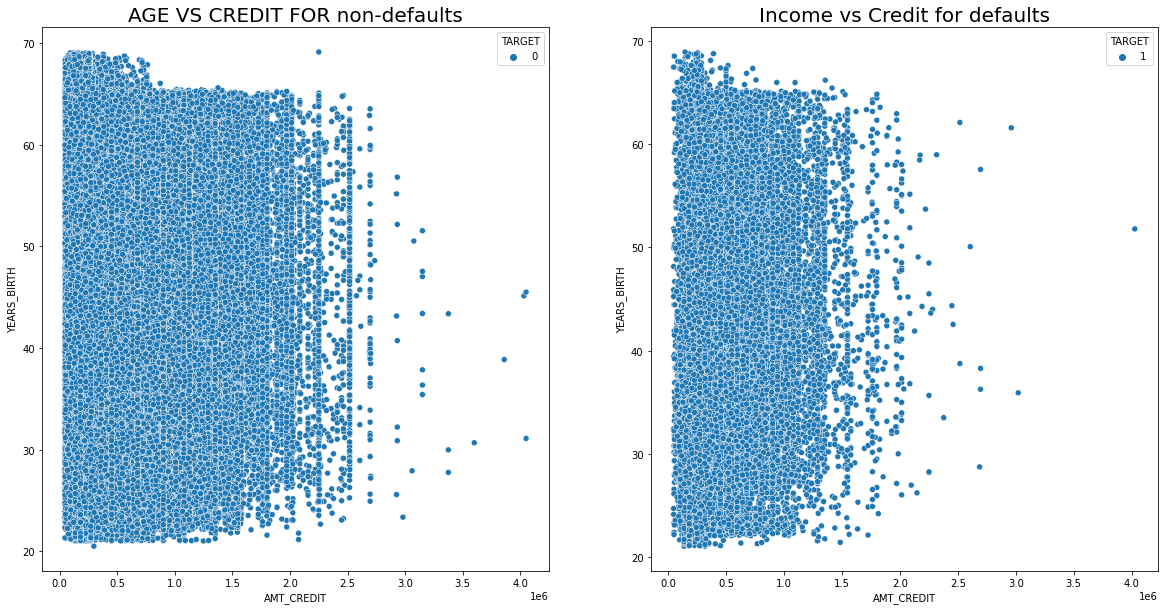

In [67]:
# SCATTER PLOT FOR AGE AND CREDIT AMOUNT.

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax=sns.scatterplot(data=ad0, x='AMT_CREDIT',y='YEARS_BIRTH', hue='TARGET')
plt.title('AGE VS CREDIT FOR non-defaults', fontsize=20)
plt.subplot(1,2,2)
ax = sns.scatterplot(data=ad1, x='AMT_CREDIT',y='YEARS_BIRTH', hue='TARGET')
plt.title('Income vs Credit for defaults', fontsize=20)
plt.show()

THE DEFAULTERS AND NON DEFAULTERS DENSITY IS SPRAD EVENLY ACROSS, FOR MOST OF THE DEFALUTERS THE CREDIT AMNT IS LESS THAN 1.5, WHEREAS THAT FOR NON DEFAULTERS IS LESS THAN 2 

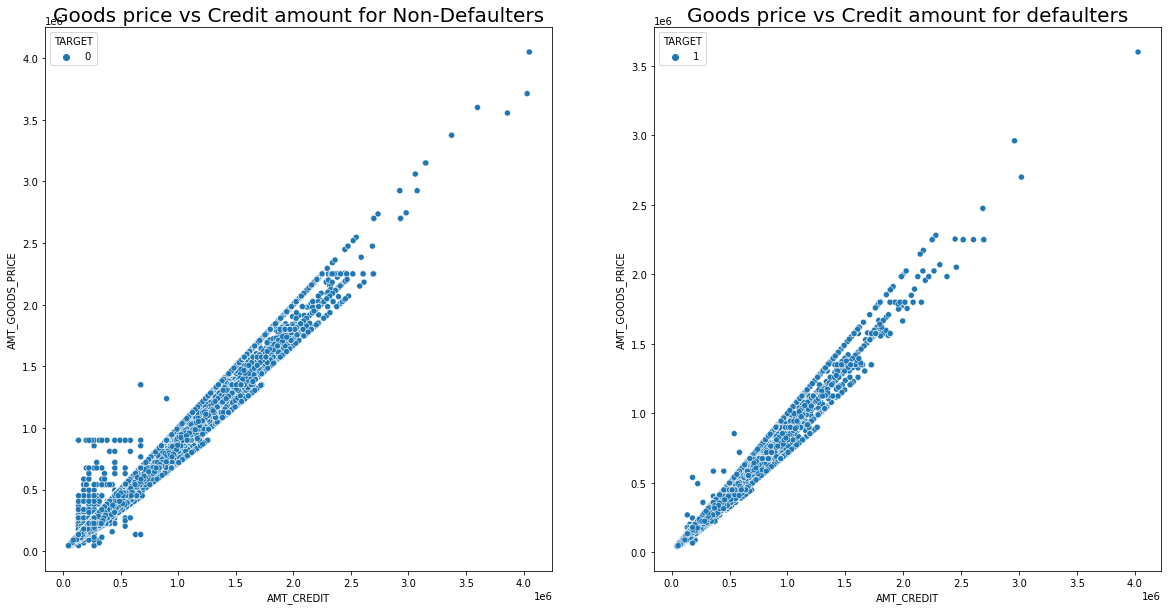

In [68]:
# SCATTER PLOT FOR CREDIT AMOUNT AND GOOD PRICE.

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax=sns.scatterplot(data=ad0, x='AMT_CREDIT',y='AMT_GOODS_PRICE', hue='TARGET')
plt.title('Goods price vs Credit amount for Non-Defaulters', fontsize=20)
plt.subplot(1,2,2)
ax = sns.scatterplot(data=ad1, x='AMT_CREDIT',y='AMT_GOODS_PRICE', hue='TARGET')
plt.title('Goods price vs Credit amount for defaulters', fontsize=20)
plt.show()

FOR BOTH THE DEFALUTERS AND NON DEFAULTERS, AS THE VALUE OF THE GOODS INCRESES, THE LOAN VALUE INCREASES

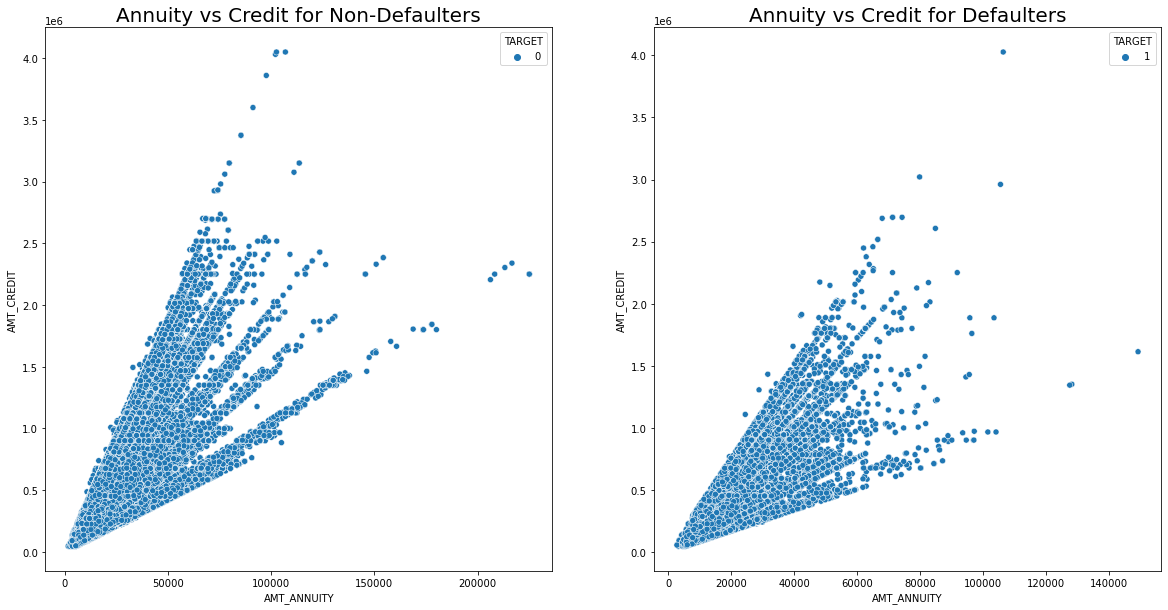

In [69]:
# SCATTER PLOT FOR ANNUITY AND CREDIT AMOUNT.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.scatterplot(data=ad0,x='AMT_ANNUITY',y='AMT_CREDIT', hue='TARGET')
plt.title('Annuity vs Credit for Non-Defaulters', fontsize=20)
plt.subplot(1,2,2)
ax = sns.scatterplot(data=ad1,x='AMT_ANNUITY',y='AMT_CREDIT', hue='TARGET')
plt.title('Annuity vs Credit for Defaulters', fontsize=20)
plt.show()

FOR BOTH DEFAOLTERS AND NON- DEFAULTERS, AS THE CREDIT INCREASES, THE ANNUITY ALSO INCREASES

## BIVARIATE ANALYSIS BETWEEN NUMERICAL AND CATEGORICAL COLUMN

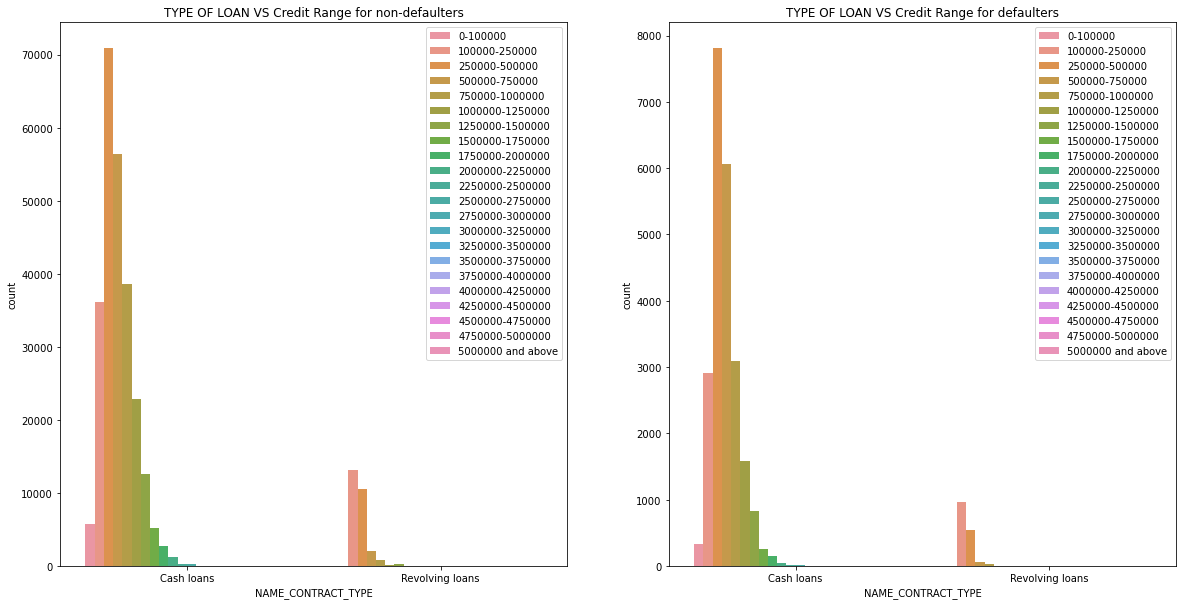

In [70]:
# COUNT PLOT FOR TYPE OF LOAN AND CREDIT RANGE.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.countplot(data=ad0,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('TYPE OF LOAN VS Credit Range for non-defaulters')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
ax = sns.countplot(data=ad1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('TYPE OF LOAN VS Credit Range for defaulters')
plt.legend(loc='upper right')
plt.show()

WE CAN SEE THAT THE CASH LOANS ARE PREFERRED IRRESPECTIVE OF THE CREDIT RANGE. AND THE MOST PREFERRED CREDIT RANGE IS 250000-500000

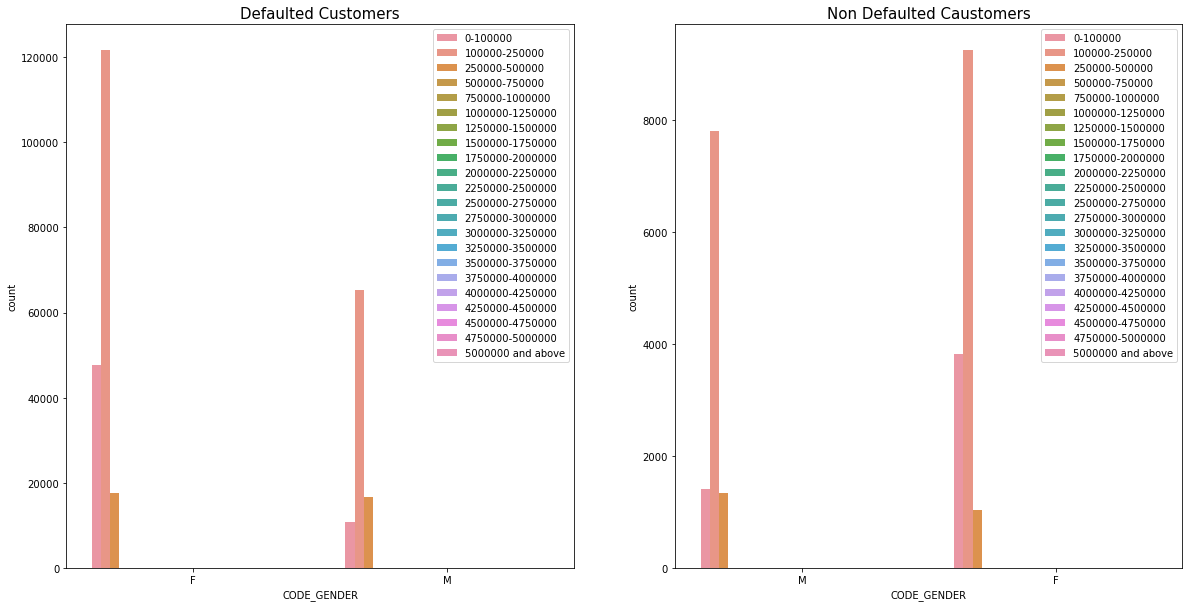

In [71]:
#ANALYSIS BETWEEN GENDER AND INCOME.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.countplot(data=ad0,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Defaulted Customers', fontsize=15)
plt.legend(loc='upper right')
plt.subplot(1,2,2)
ax = sns.countplot(data=ad1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Non Defaulted Caustomers', fontsize=15)
plt.legend(loc='upper right')
plt.show()

WE SEE THAT BOTH AMONG DEFALTERS AND NON DEFAULTERS FEMALES HAVE THE HIGHEST AMOUNT OF INCOME RANGE

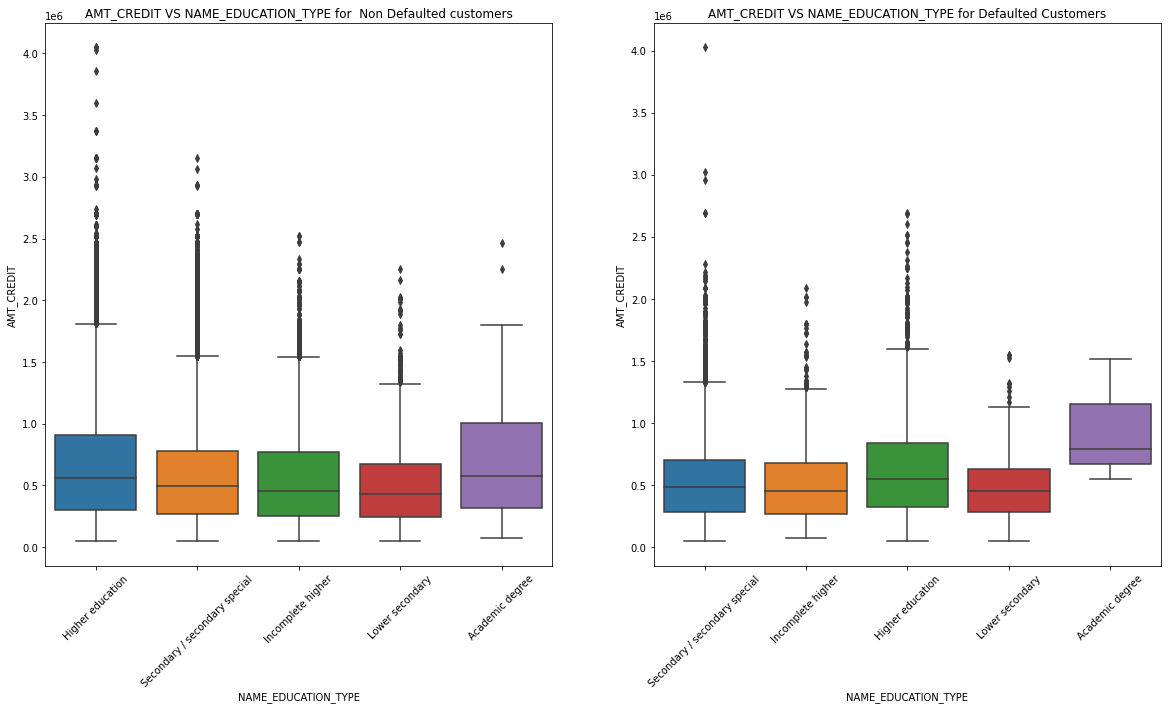

In [72]:
# BOX PLOT FOR CREDIT AMOUNT AND EDUCATION TYPE.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=ad0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('AMT_CREDIT VS NAME_EDUCATION_TYPE for  Non Defaulted customers')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
ax = sns.boxplot(data=ad1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('AMT_CREDIT VS NAME_EDUCATION_TYPE for Defaulted Customers')
plt.xticks(rotation=45)
plt.show()

###
WE SEE THAT AMONGS THE NON DEFAULTED CUSTOMERS, PEOPLE WITH HIGHER EDUCATION HAVE AVAILED MORE CREDIT COMPARED TO OTHER EDUCATION CATEGORIES.
AMONGST DEFAULTED CUSTOMERS THE HIGHEST CREDIT AVAILED IS BY SECONDARY EDUCATION TYPE.

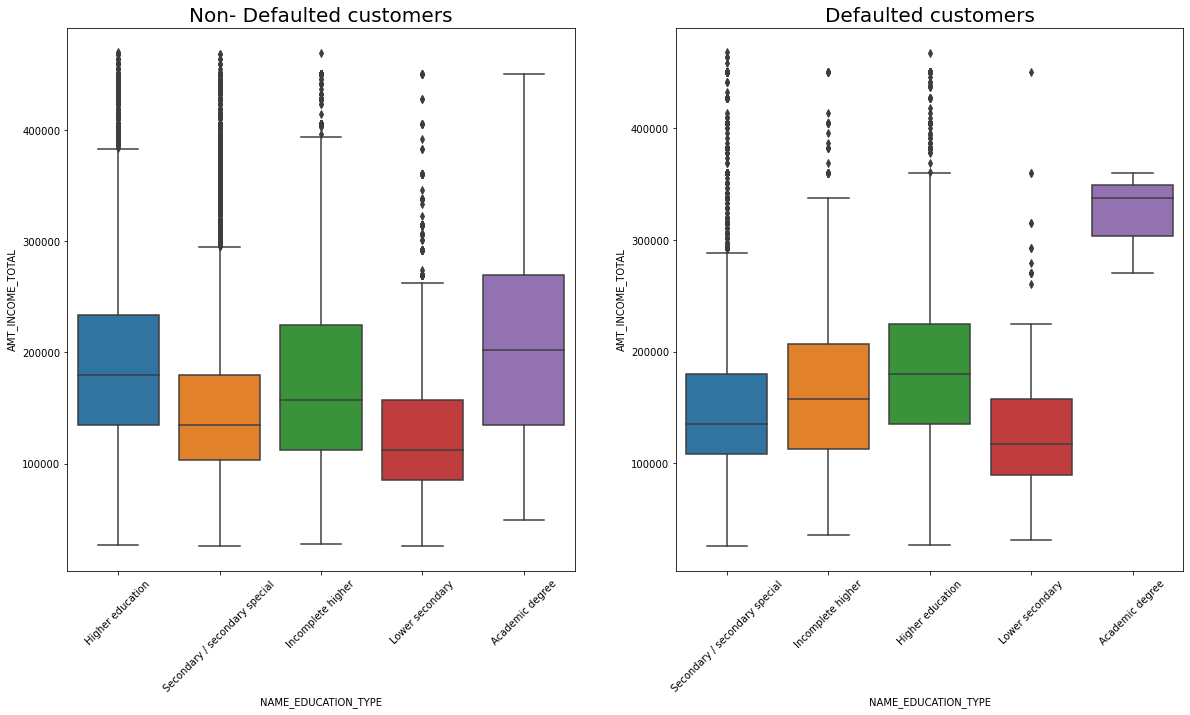

In [73]:
# BOXPLOT FOR INCOME AND EDUCATION TYPE.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=ad0,y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Non- Defaulted customers', fontsize=20)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
ax = sns.boxplot(data=ad1,y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Defaulted customers', fontsize=20)
plt.xticks(rotation=45)
plt.show()

##### FROM THE PLOT WE SEE THAT THE ACADEMIC DEGREE TYPE OF CLIENTS HAVE AVAILED A WIDE RANGE OF CREDITS AMONGST THE NON DEFAULTERS, WHERE AS AMONGST THE DEFAULTERS ITS CONCENTRATED IN A CERTAIN RANGE.


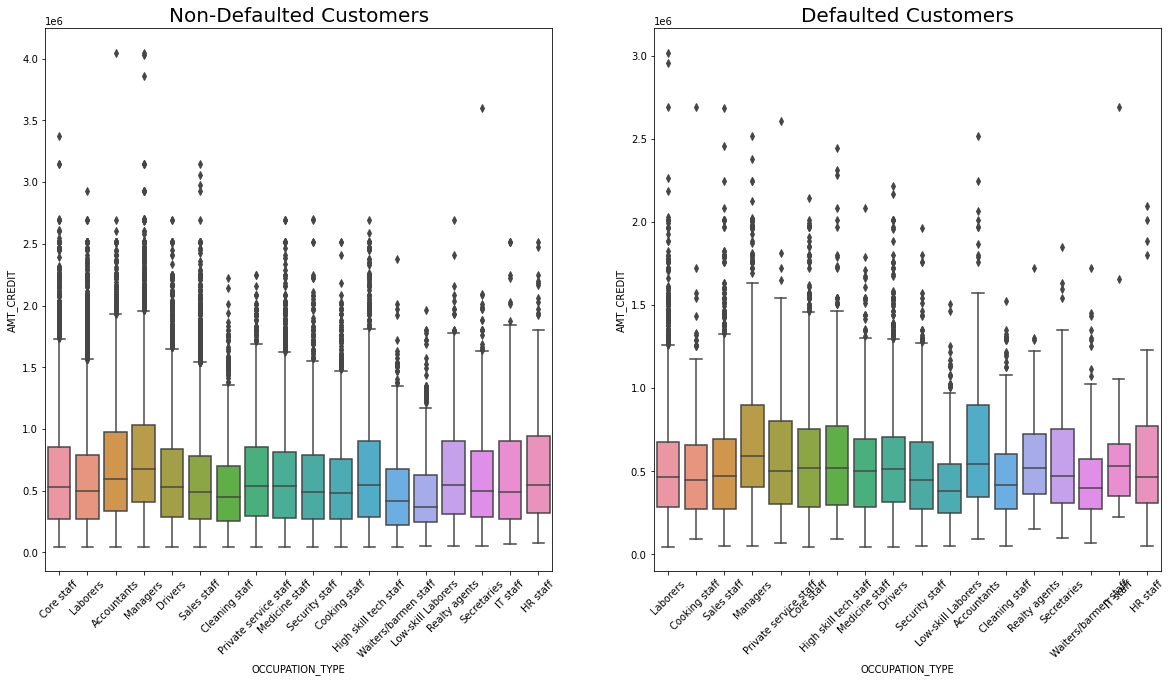

In [74]:
# BOXPLOT FOR OCCUPATION AND THE CREDIT AMOUNT OF THE CLIENTS.

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=ad0,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.title('Non-Defaulted Customers',fontsize=20)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
ax = sns.boxplot(data=ad1,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.title('Defaulted Customers', fontsize=20)
plt.xticks(rotation=45)
plt.show()

###THE OCCUPATION TYPE OF DEFAULTED CUSTOMERS ARE MORE COMPARED TO NON DEFAULTED CUSTOMERSM, LOOKS LIKE MANAGERS HAVE AVAILED MORE LOAN IN BOTH THE CASES, ANOTHER INTERESTING POINT IS LOW SKILL LABOURERES HAVE ALSO AVAILED SIGNIFANT LOANS AMONGST DEFAULTERS.

# PREVIOUS APPLICATION DATA SET.

In [75]:
# READING THE PREVIOUS APPLICATION DATA SET.

pad=pd.read_csv("previous_application.csv")
pad.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# CHECKING THE SHAPE OF THE DATA SET.

pad.shape

(1670214, 37)

In [77]:
#DESCRIBING THE DATA SET.

pad.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [78]:
# USINGTHE INFO() FUNCTION TO FIND THE DATA TYPES OF THE COLUMNS.

pad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [79]:
#Finding the percentage of null values.

round((100*pad.isnull().sum()/len(pad)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [80]:
# Visually inspecting all the columns with Null VAues
pad.loc[:, pad.isnull().any()]

,AMT_ANNUITY,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_TYPE_SUITE,CNT_PAYMENT,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,0.0,17145.0,0.000000,0.182832,0.867336,NaN,12.0,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,679671.0,NaN,607500.0,NaN,NaN,NaN,Unaccompanied,36.0,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,136444.5,NaN,112500.0,NaN,NaN,NaN,"Spouse, partner",12.0,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,470790.0,NaN,450000.0,NaN,NaN,NaN,NaN,12.0,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,404055.0,NaN,337500.0,NaN,NaN,NaN,NaN,24.0,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,14704.290,311400.0,0.0,267295.5,0.000000,NaN,NaN,NaN,30.0,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,6622.020,64291.5,29250.0,87750.0,0.340554,NaN,NaN,Unaccompanied,12.0,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,11520.855,102523.5,10525.5,105237.0,0.101401,NaN,NaN,"Spouse, partner",10.0,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,18821.520,191880.0,NaN,180000.0,NaN,NaN,NaN,Family,12.0,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [81]:
# There are 16 columns with null values
# Finding the columns with more than 50% null values.
pad.columns[pad.isnull().mean()>=.4]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [82]:
# Dropping the above columns from the data frame.
pad=pad.drop(['NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], axis=1)

In [83]:
#Checking the shape post dropping the columns.

pad.shape

(1670214, 30)

In [84]:
pad.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [85]:
# Percentage of null columns.
round((100*pad.isnull().sum()/len(pad)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
C

In [86]:
# Finding the number of uique values.
# Visually inspecting the data set, we find that there are some'XNA', and 'XAP', values.
#We will replace them with NaN, to do a better analysis

pad.replace('XNA',np.nan,inplace=True)
pad.replace('XAP',np.nan,inplace=True)

In [87]:
# checking for unique values.

ad.nunique().sort_values()

FLAG_MOBIL                         2
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
AMT_INCOME_RANGE                   3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
DEF_60_CNT_SOCIAL_CIRCLE           9
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
AMT_CREDIT_RANGE                  18
OCCUPATION_TYPE                   18
HOUR_APPR_PROCESS_START           24
A

##
Merging the application_data with previous application data


In [88]:
cd= pd.merge(left=ad,right=pad,how='inner',on='SK_ID_CURR',suffixes='_x')

In [89]:
# checking the shape of the combined dataframe "cd"
cd.shape

(1401271, 73)

In [90]:
# Chcking the term of the previous credit application for the previous application.

cd['CNT_PAYMENT'].describe()

count    1.096731e+06
mean     1.603973e+01
std      1.455239e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [91]:
cd.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,Laborers,1.0,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,-828,Cash through the bank,NaN,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,Core staff,2.0,MONDAY,11,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,NaN,Approved,-2341,Cash through the bank,NaN,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,Laborers,1.0,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,NaN,Approved,-815,Cash through the bank,NaN,New,Mobile,POS,NaN,Re

### PERFORMING UNIVARIATE ANALYSIS

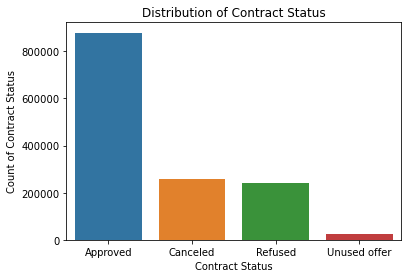

In [92]:
# ANALYSIS OF THE CONTRACT STATUS.

sns.countplot(cd.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

###
WE SEE FROM THE COMBINED DATA THAT THE NUMBER OF APPROVED LOANS ARE MORE THAN CANCELLED OR REFUSED. DOING FURTHER ANALYSIS ON THIS TO GET SOME INFERENCE.

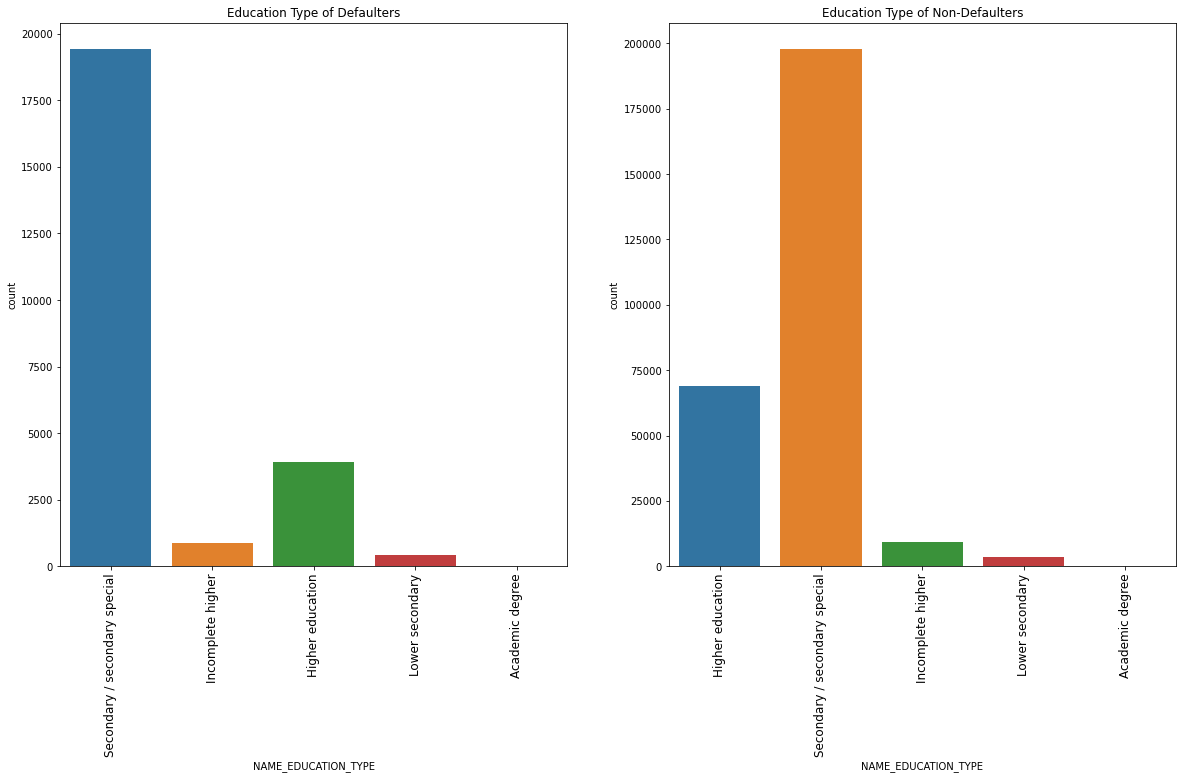

In [93]:
# ANALYSIS OF DEFAULTERS AND NON-DEFAULTERS W.R.T THEIR EDUCATION TYPE.

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.countplot(x ='NAME_EDUCATION_TYPE',data = ad1)
plt.title('Education Type of Defaulters')
plt.xticks(rotation=90, fontsize=12)
plt.subplot(1,2,2)
sns.countplot(x ='NAME_EDUCATION_TYPE', data = ad0)
plt.title('Education Type of Non-Defaulters')
plt.xticks(rotation=90, fontsize=12)
plt.show()


## 
THE SECONDARY EDUCATION IS HIGHEST AMONG BOTH THE SITUATIONS, FOLLOWED BY HIGHER EDUCATION AND INCOMPLETE HIGHER. SO BOTH THE GRAPHS ARE PRETTY SIMILAR.

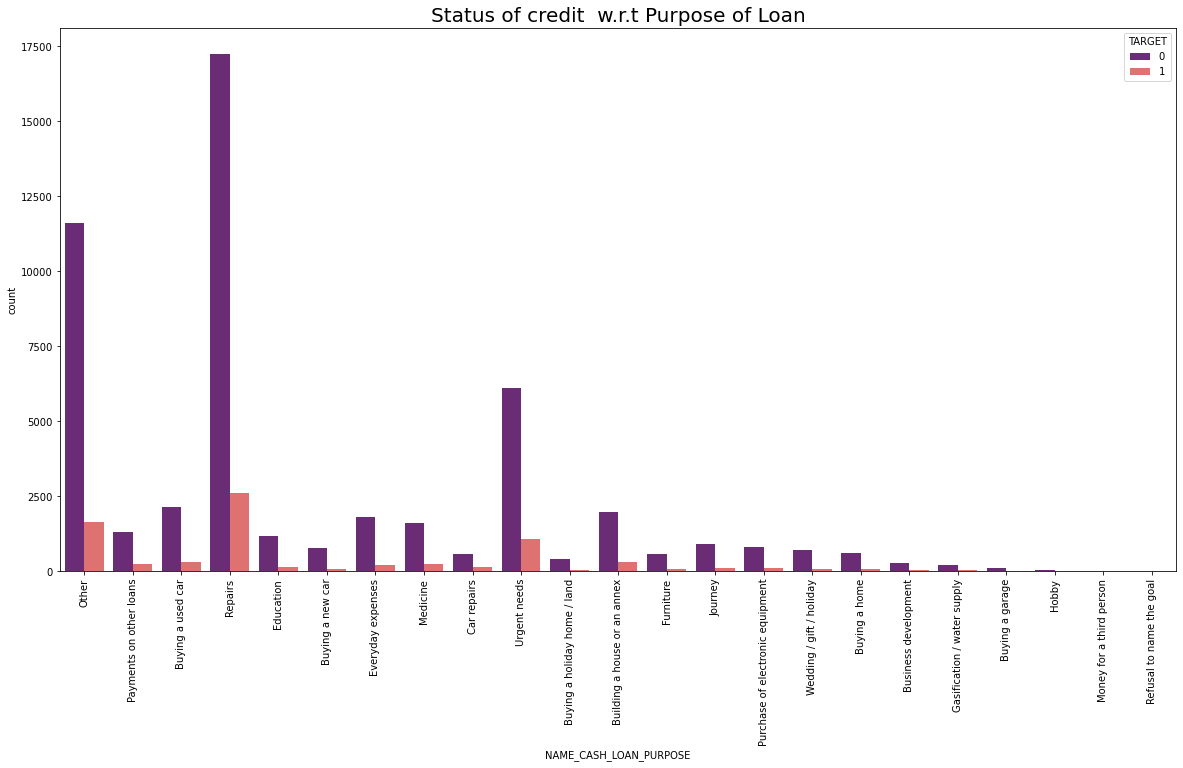

In [94]:
#ANALYSIS OF PURPOSE OF THE LOAN W.R.T DEFAULTERS AND NON-DEFAULTERS.

plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET',palette='magma') 
plt.title('Status of credit  w.r.t Purpose of Loan', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


#
LOAN APPLIED FOR REPAIRS IS THE HIGHEST IN BOTH THE DEFAULTERS AND NON-DEFAULTERS. WHERE AS IT IS FOLLOWED BY OTHER NEEDS AND URGENT NEEDS. EDUCATION, HOUSE, MEDIACL AND CAR LOANS ARE FOLLOWED BY NEXT.

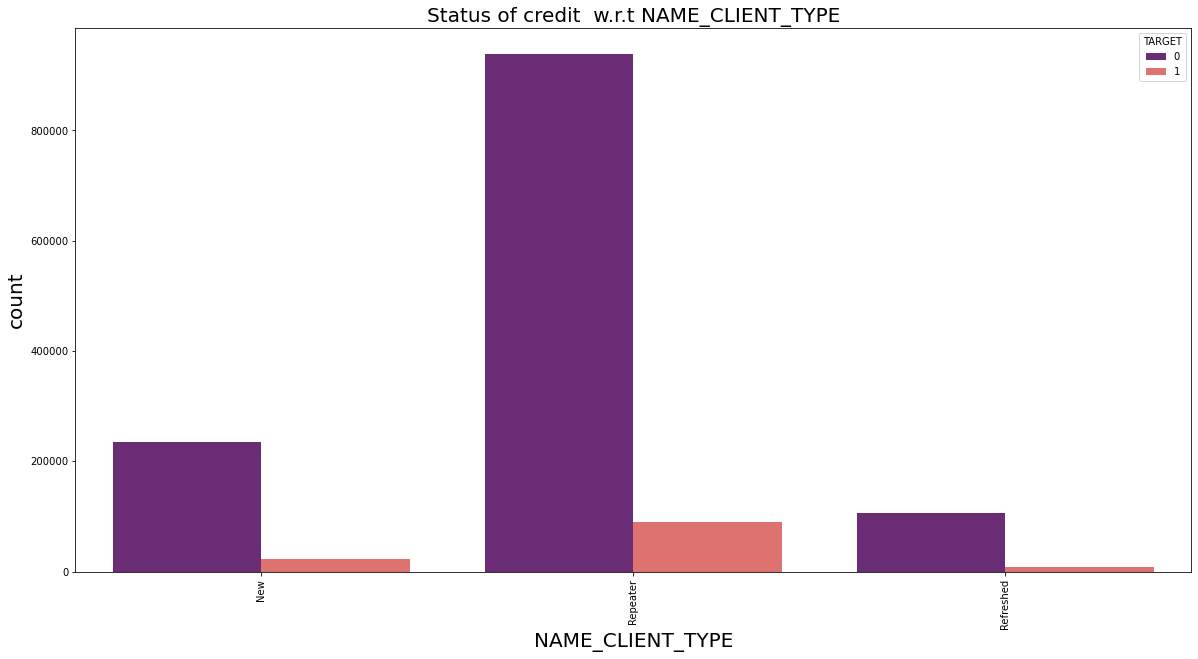

In [95]:
# STATUS OF CREDIT W.R.T CLIENT TYPE.

plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_CLIENT_TYPE',hue = 'TARGET',palette='magma') 
plt.title('Status of credit  w.r.t NAME_CLIENT_TYPE', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


#
REPEATERS AMONG THE DEFAULTERS AND NON- DEFAULTERS IS HIGHEST, FOLLOWED BY NEW AND REFRESHED. BUT THE DIFFERENCE BETWEEN BOTH THE DEFAULTERS AND NON- DEFAULTERS IS HUGE.SO, IF YOU ARE AVAILING A REPEAT CREDIT, THE CHANCES OF CREDIT BEING APPROVED IS HIGH.

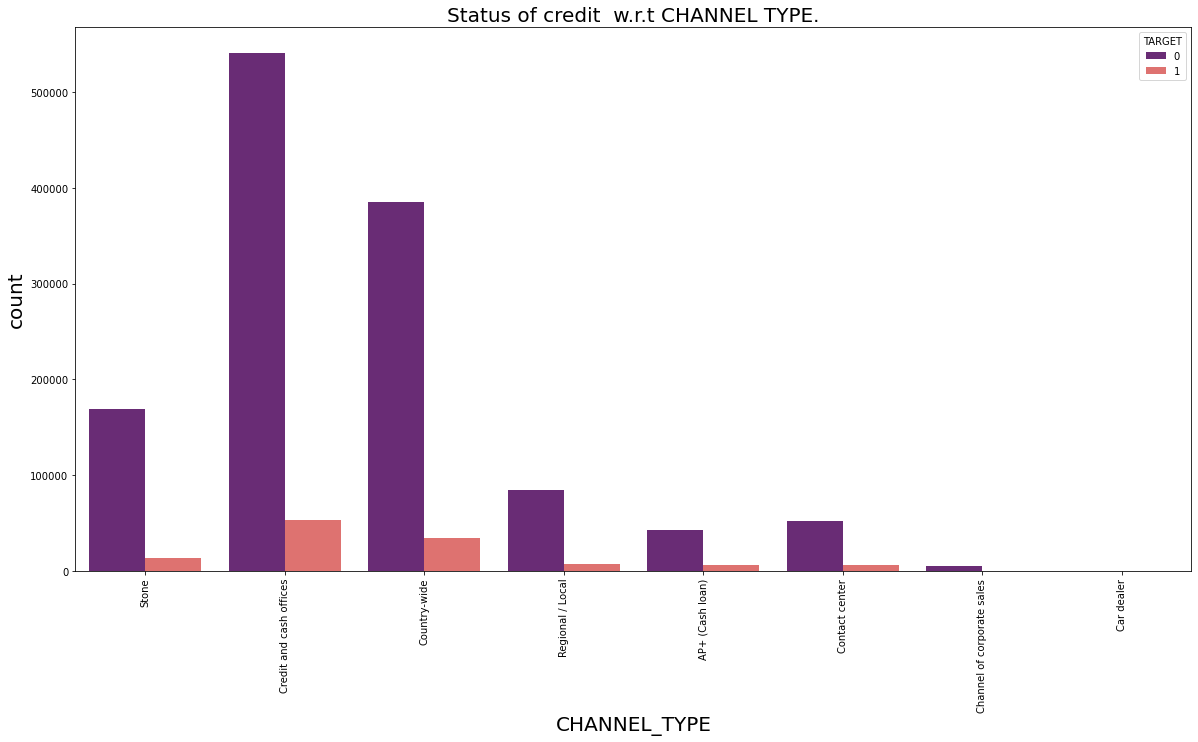

In [96]:
# Status of credit  w.r.t CHANNEL TYPE.
plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'CHANNEL_TYPE',hue = 'TARGET',palette='magma') 
plt.title('Status of credit  w.r.t CHANNEL TYPE.', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


FOR NON DEFAULTED CLIENTS, THE CHANNEL OF ACQUISITON WAS THROUGH CASH AND CREDIT OFFICES, FOLLOWED BY COUNTRY WIDE ACQUISITON.

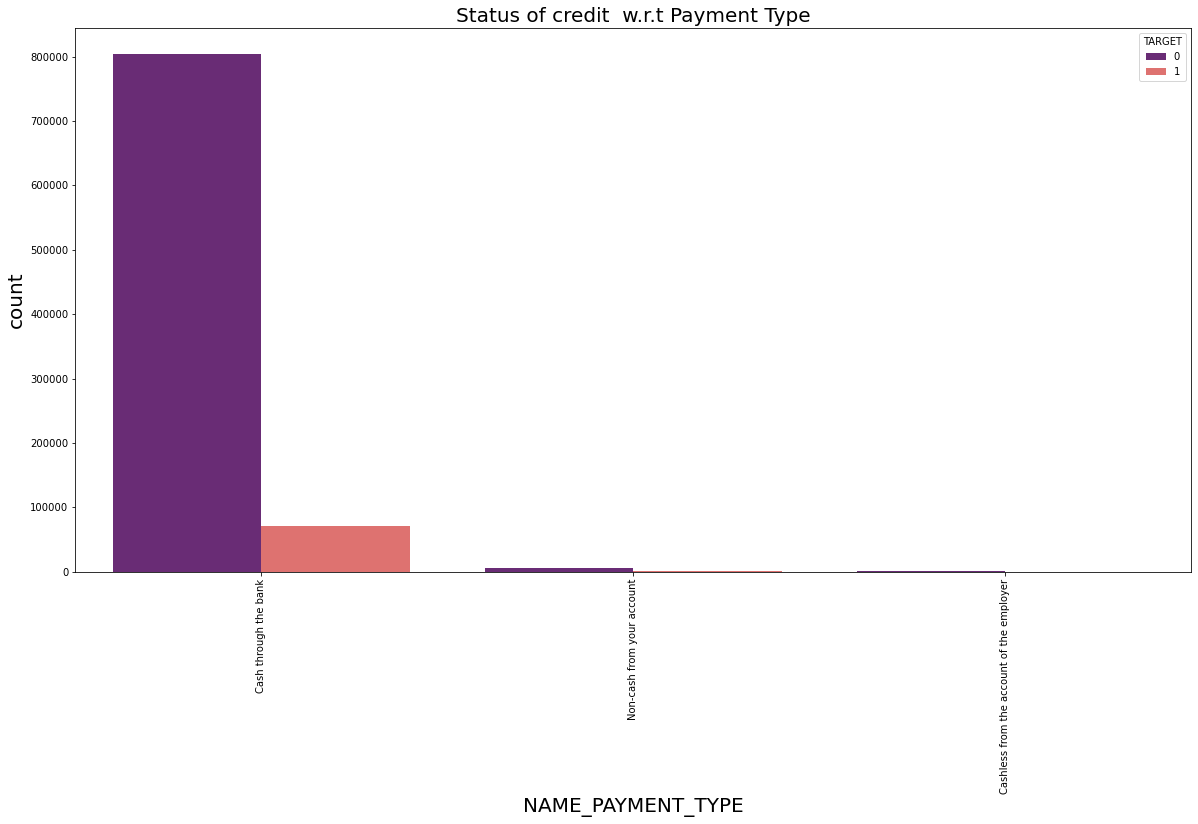

In [97]:
#STATUS OF CREDIT W.R.T PAYMENT TYPE.

plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_PAYMENT_TYPE',hue = 'TARGET',palette='magma') 
plt.title('Status of credit  w.r.t Payment Type', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


#
CASH PAYMENT SEEMS TO BE THE MOST PREFERRED WAY FOR THE BANKS, AS MOST OF THE NON- DEFAULTERS HAVE PAID VIA CASH.

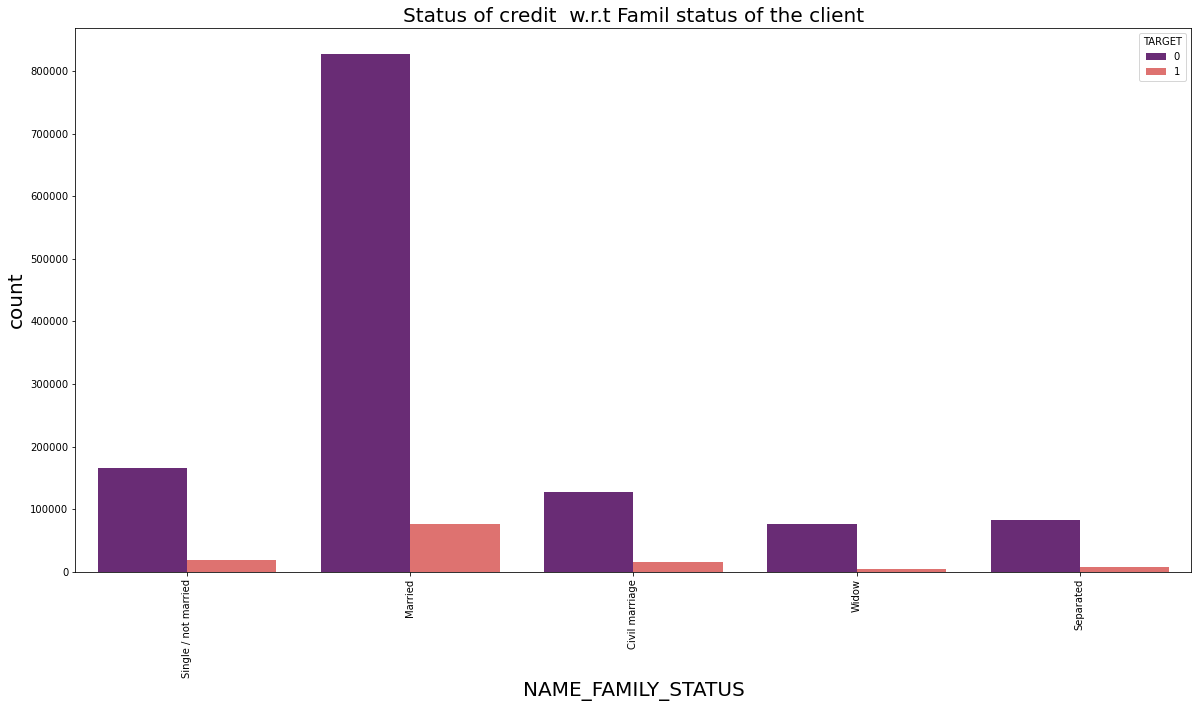

In [98]:
# ANALYSIS OF THE FAMILY STATUS OF THE CLIENTS.
plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_FAMILY_STATUS',hue = 'TARGET',palette='magma') 
plt.title('Status of credit  w.r.t Famil status of the client', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


##
MARRIED COUPLES ARE THE MOST IN NON-DEFAULTERS. WHICH ARE FOLLWED BY SINGLE, CIVIL MARRIAGE, WIDOW AND SEPERATED

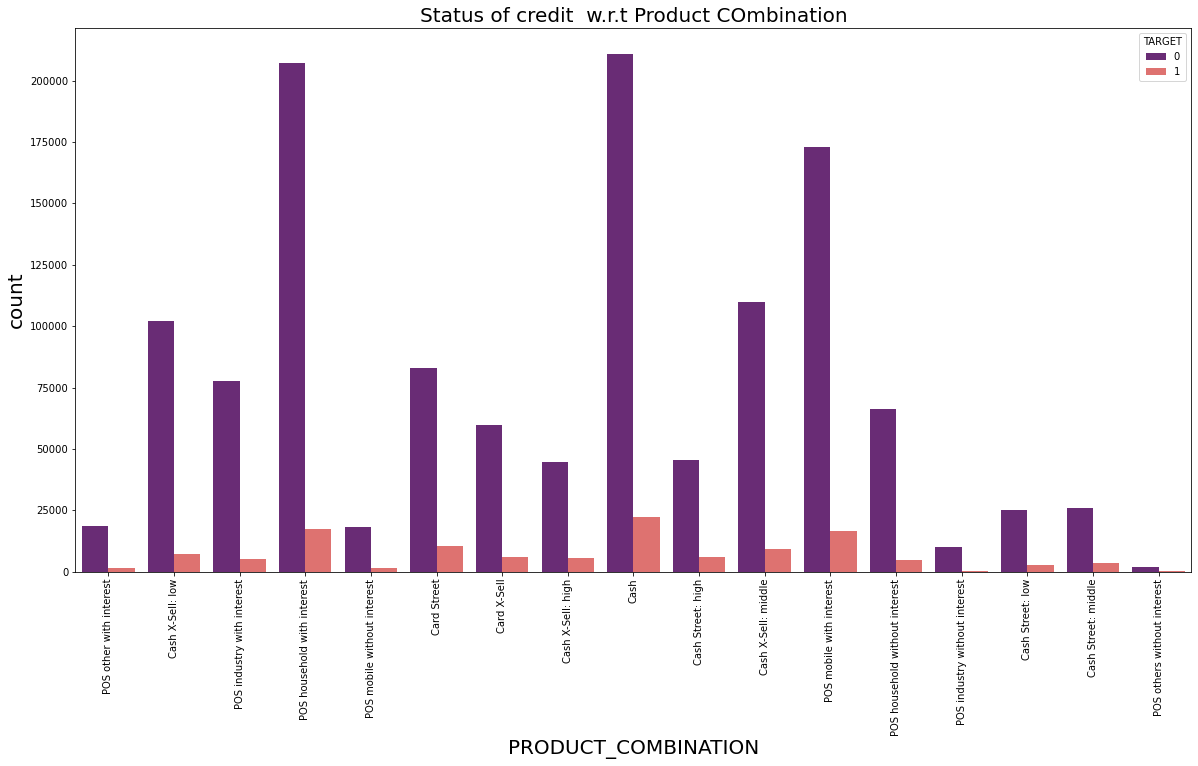

In [99]:
# ANALYSIS OF PRODUCT COMBINATION W.R.T DEFAULTERS AND NON-DEFAULTERS.

plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'PRODUCT_COMBINATION',hue = 'TARGET',palette='magma') 
plt.title('Status of credit  w.r.t Product COmbination', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


#
THE PRODUCT COMBINATION CASH AND POS HOUSEHOLD WITH INTEREST HAS THE HIGHEST VALUE OF NON-DEFAULTERS.

### BIVARIATE ANALYSIS

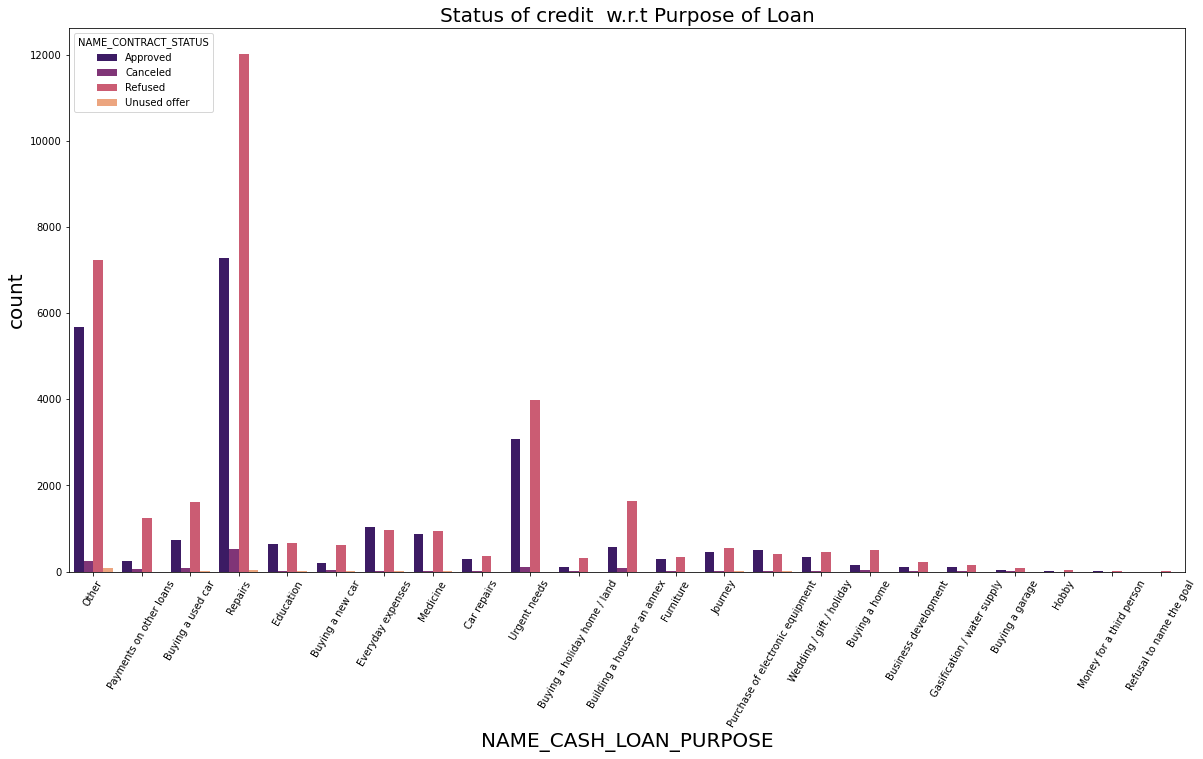

In [100]:
#STATUS OF CREDIT W.R.T LOAN PURPOSE.

plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_CASH_LOAN_PURPOSE',hue = 'NAME_CONTRACT_STATUS',palette='magma') 
plt.title('Status of credit  w.r.t Purpose of Loan', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=60, fontsize=10)
plt.show()


# 
REPAIRS HAVE THE HIGHEST APPROVED AND REFUSED LOANS. THE SECOND HIGHEST IS OF OTHERS CATEGORY. AND IT IS FOLLOWED BY URGENT NEEDS

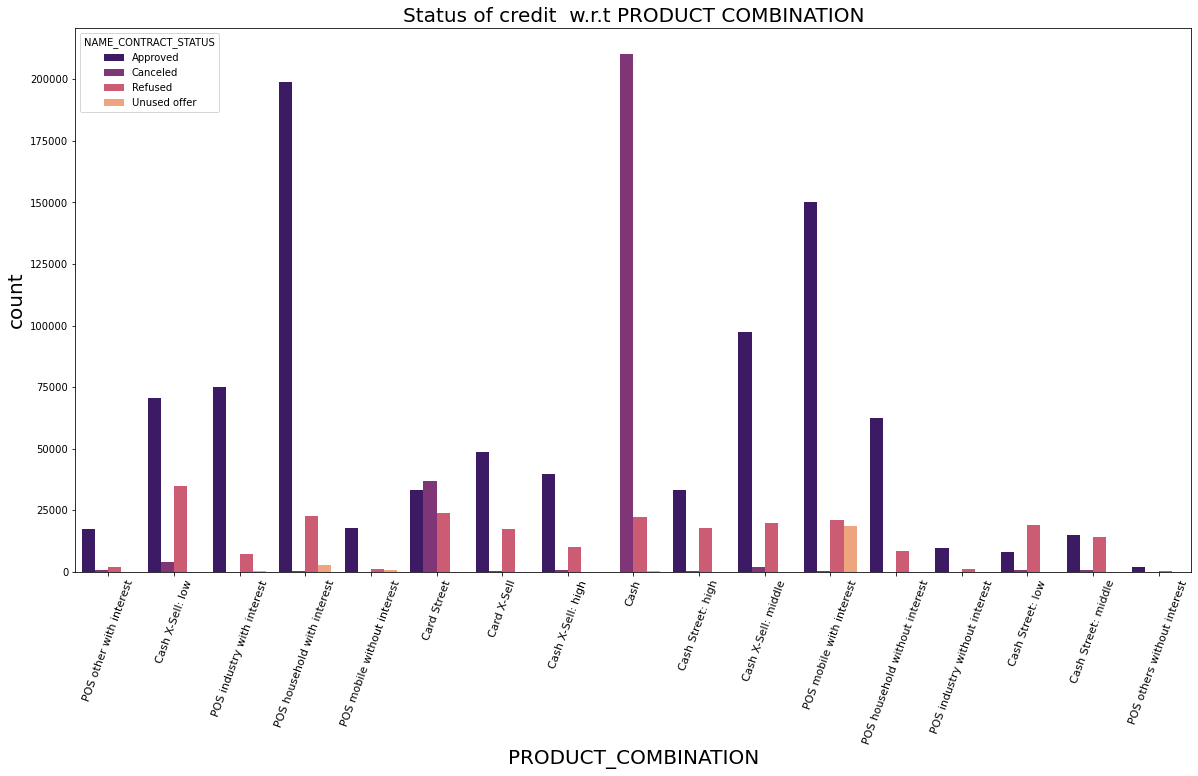

In [101]:
# Status of credit  w.r.t PRODUCT COMBINATION
plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'PRODUCT_COMBINATION',hue = 'NAME_CONTRACT_STATUS',palette='magma') 
plt.title('Status of credit  w.r.t PRODUCT COMBINATION', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=70, fontsize=11)
plt.show()


#
HIGHEST APPROVED IS OF POS HOUSEHOLD WITH INTEREST, HIGHEST CANCELLED IS CASH,HIGHEST REFUSED IS OF CASH, X-SELL.

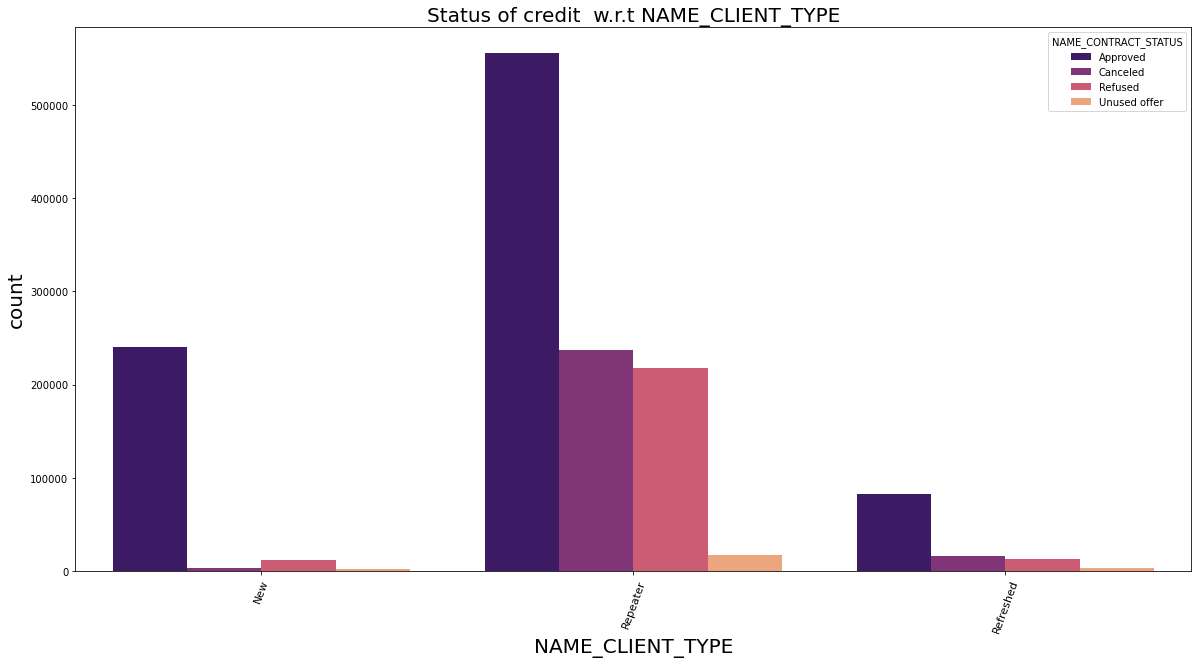

In [102]:
# Status of credit  w.r.t NAME_CLIENT_TYPE

plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_CLIENT_TYPE',hue = 'NAME_CONTRACT_STATUS',palette='magma') 
plt.title('Status of credit  w.r.t NAME_CLIENT_TYPE', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=70, fontsize=11)
plt.show()


#
HIGHEST APPROVED IS OF REPEATER WHILE SECOND HIGHEST IS THAT OF NEW CLIENTS. REPEATERS ONLY HAVE HIGHEST AMOUNT OF CANCELLED, REJECTED AND UNUSED OFFERS.

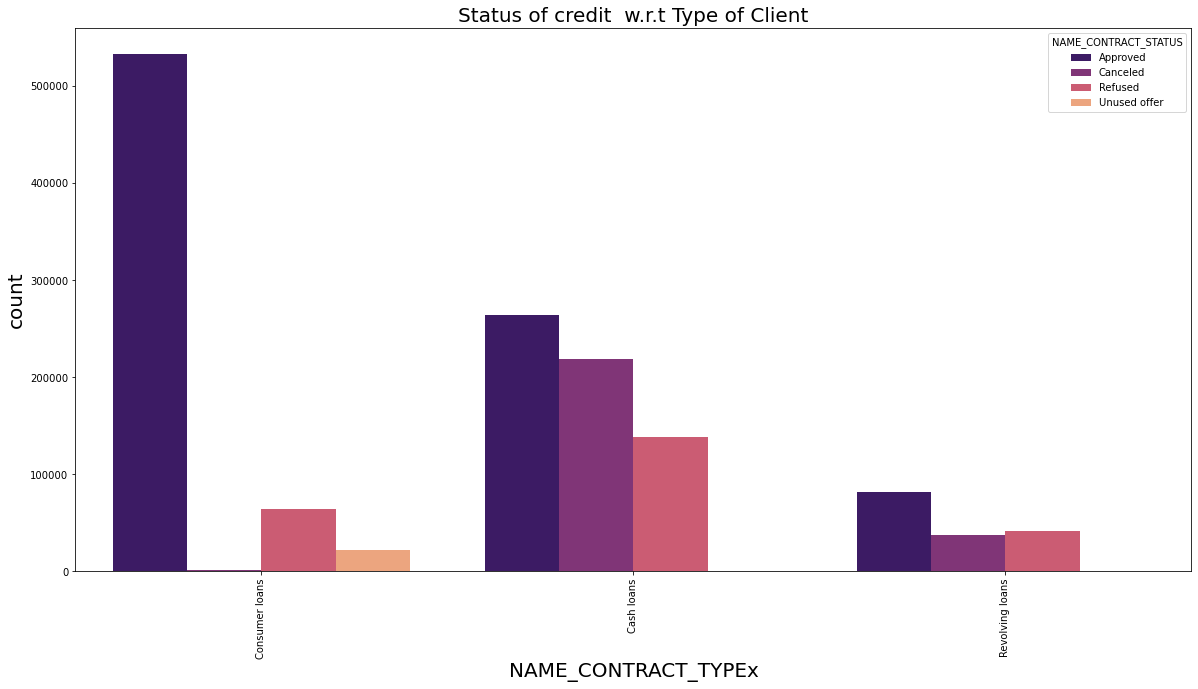

In [103]:
# CONTRACT STATUS W.R.T THE CONTRACT TYPE OF THE PREVIOUS DATA.
plt.figure(figsize=(20,10))
sns.countplot(data=cd, x= 'NAME_CONTRACT_TYPEx',hue = 'NAME_CONTRACT_STATUS',palette='magma') 
plt.title('Status of credit  w.r.t Type of Client', fontsize=20)
plt.rcParams["axes.labelsize"] = 20
plt.xticks(rotation=90)
plt.show()


#
CONSUMER LOANS ARE THE HIGHEST APPROVED IN PREVIOUS DATA, FOLLOWED BY CASH AND REVOLVING LOANS.THE HIGHEST CANCELLED AND REFUSED ARE OF CASH LOANS.

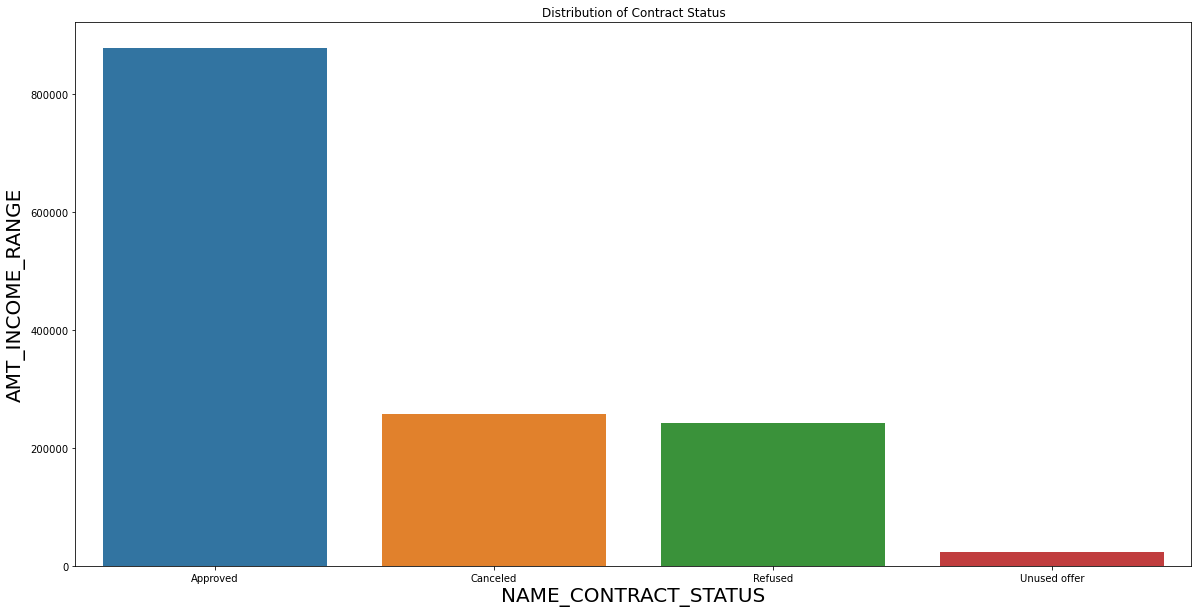

In [104]:
# ANALYSIS OF CONTRACT STATUS W.R.T TO INCOME RANGE.
plt.figure(figsize=(20,10))
sns.countplot(cd.NAME_CONTRACT_STATUS)
plt.xlabel('NAME_CONTRACT_STATUS')
plt.ylabel('AMT_INCOME_RANGE')
plt.title("Distribution of Contract Status")
plt.show()

# 
THE HIGHEST INCOME FOR THE APPROVED LOANS ARE MORE THAN 800000, WHILE THAT FOR CANCELLED AND REFUSED LOANS ARE LESS THAN 300000, WHILE UNUSED OFFERS ARE LESS THAN 50000

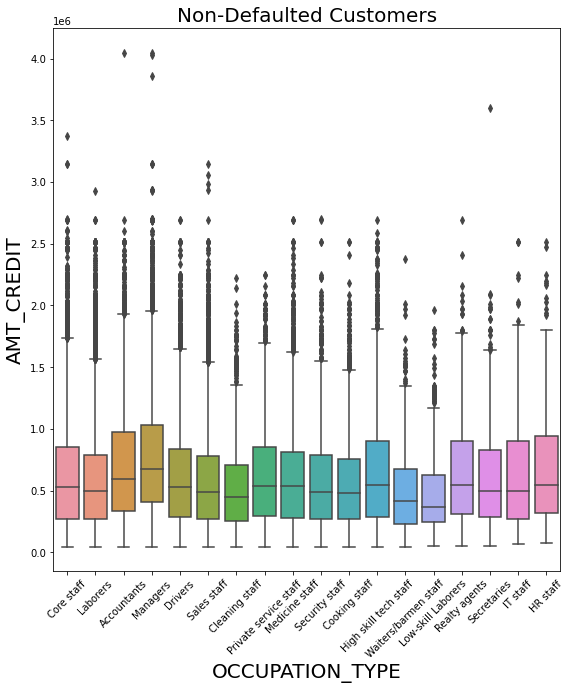

In [105]:
# analysis of occupation type w.r.t the credit amount.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=ad0,x='OCCUPATION_TYPE',y='AMT_CREDIT')
plt.title('Non-Defaulted Customers',fontsize=20)
plt.xticks(rotation=45)
plt.show()

####
WE SEE THAT THE MANAGERS AND ACCOUNTANTS TEND TO HAVE LARGE OUTLIERS, THEY ALSO SEEM TO HAVE THE HIGHEST CREDIT AMOUNT COMPARED TO OTHERS.

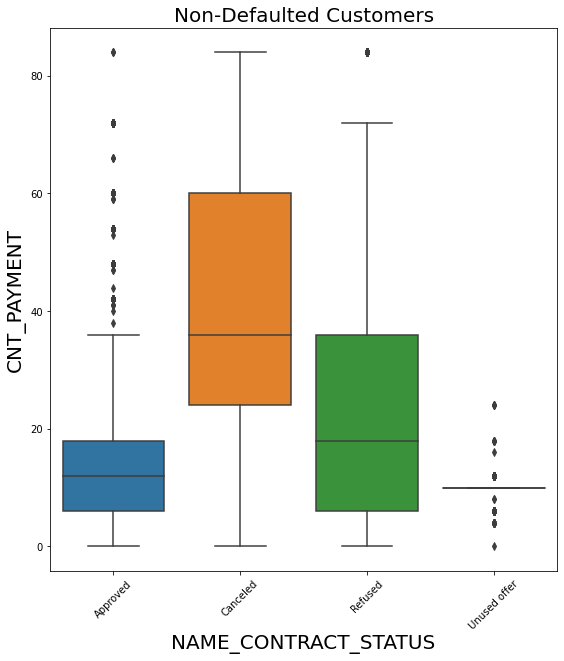

In [106]:
# CONTRACT STATUS W.R.T CNT PAYMENT. 

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=cd,x='NAME_CONTRACT_STATUS',y='CNT_PAYMENT')
plt.title('Non-Defaulted Customers',fontsize=20)
plt.xticks(rotation=45)
plt.show()



#
APPROVED CNT_PAYMENTS ARE BETWEEN 0-40, WITH SOME OUTLIERS, WHERE AS CNACELLED LOANS EXIST ACROSS ALL CNT_PAYMENTS. MOST OF THE REFUSED LOANS EXIST IN THE RANGE OF 10-40.

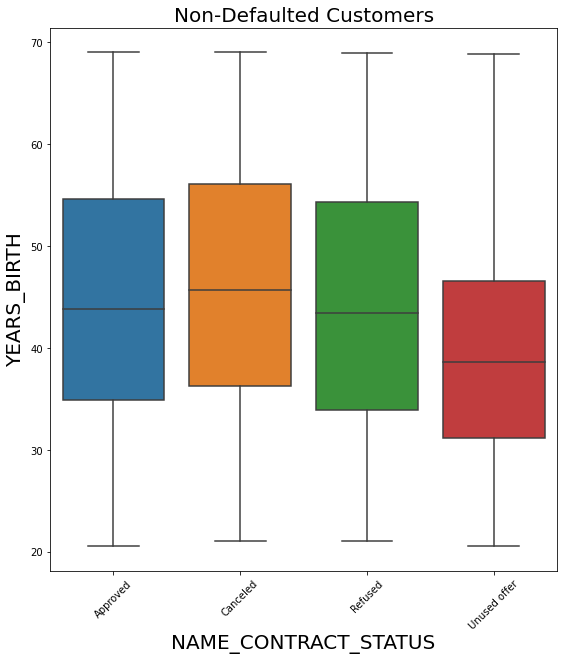

In [107]:
# ANALYSIS W.R.T AGE OF THE CLIENT AND THE CONTRACT STATUS.
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=cd,x='NAME_CONTRACT_STATUS',y='YEARS_BIRTH')
plt.title('Non-Defaulted Customers',fontsize=20)
plt.xticks(rotation=45)
plt.show()



#
THE AGE GROUP OF MOST OF THE CLIENTS LIES ACROSS 35-55. THE YOUNGEST AGE SEEMS TO BE IN THE UNUSED OFFER, MEANING, IF THE CLIENTS ARE YOUNG, THEY MAY NOT REALLY, GO FOR THE LOAN. THERE IS NOT MUCH DIFFERENCE IN THE CLIENT AGE DISTRIBUTION GROUP OF APPROVED, CACELED AND REFUSED

### DRIVER VARIABLES

1) NAME_EDUCATION_TYPE
2) NAME_INCOME_TYPE
3) DAYS_BIRTH
4) AMT_INCOME_TOTAL
5) NAME_CASH_LOAN_PURPOSE
6) CODE_GENDER
7) NAME_FAMILY_STATUS
8) OCCUPATION_TYPE
9) AMT_CREDIT
10) AMT_INCOME


## INFERENCES

1)Cash Loans are much preferred by the clients, and a significant number, of no defaulters
2)A lot of non defaulters are not car owners, we can assume that, the non defaulters pay,
  when they have less overheads.
3)A lot of home owners have repaid their loan.
4)Most working professionals and business owners are non defaulters.
5)Secondary education dominates in most defaulters and non defaulters.
6)Married couple tend to repay their loan, with widows being the least chance of paying their
  loan.
7)Majority of loan applicants and non defaulters are females.
8)Age group of 35 45 tend to default less.
9)High earners tend to default less.
10)As the value of the item for ehich the loan increases, the loan value also increases.
11)Credit range of 250000 to 500000 have availed cash loans.
12)Females earn more than males and their income ranges are between 100000=250000
13)Higher education and secondary education have availed more credit compared to other
  categories.
14)People with academic degree have higher incomes, so chances of them defaulting is low.
15)Accountants, managers, high skill tech staff have availed higher credit compared to other
   professions, and have a less chance of defaulting.
17)Approved loans are the highest compared to refused and cancelled loans, for the previous
   applications.
18)Secondary and secondary special education types tend to default less, compared to others.
19)Non Defaulters have availed loans for repairs, oter needs and urgent needs, compared to
   others.
20)Repeaters tend to pay their loans successfully.
21)Repaying the loan through cash is much preferred by the non
   defaulters.
22)If loans are availed citing repair reasons, the chances of the loans being approved are high.
23)Higher the income range, higher the chance of loans being approved.
24)Consumer loans are highest approved in the previous data, followed by cash and revolving.